In [434]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [436]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#%matplotlib inline  ###In Jupyter Notebooks, %matplotlib inline is a magic command that allows matplotlib plots to
                      #appear inline within the notebook. This implies that rather than opening in another window.

In [438]:
# Setting float values to display upto 2 decimal points and restricting the datasets to display upto 100 rows and columns.
pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Data cleaning and data analysis of csv file application_data.

In [452]:
# Reading dataset from local
ap=pd.read_csv('application_data.csv')
ap

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0         202500.00   406597.50   
1                    N             0         270000.00  1293502.50   
2                    Y             0          67500.00   135000.00   
3                    Y             0         135000.00   312682.50   
4                    Y             0         121500.00   513000.00   
...                ...           ...               ...         ...   
307506               N             0         157500.00   254700.00   
307507               Y             0          72000.00   269550.00   
307508               Y             0         153000.00   677664.00   
307509               Y             0         171000.00   370107.00   
307510               N             0         157500.00   675000.00   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          24700.50        351000.00   Unaccompanied               Working   
1          35698.50       1129500.00          Family         State servant   
2           6750.00        135000.00   Unaccompanied               Working   
3          29686.50        297000.00   Unaccompanied               Working   
4          21865.50        513000.00   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506     27558.00        225000.00   Unaccompanied               Working   
307507     12001.50        225000.00   Unaccompanied             Pensioner   
307508     29979.00        585000.00   Unaccompanied               Working   
307509     20205.00        319500.00   Unaccompanied  Commercial associate   
307510     49117.50        675000.00   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                        0.02       -9461   
1       House / apartment                        0.00      -16765   
2       House / apartment                        0.01      -19046   
3       House / apartment                        0.01      -19005   
4       House / apartment                        0.03      -19932   
...                   ...                         ...         ...   
307506       With parents                        0.03       -9327   
307507  House / apartment       

In [456]:
# Determining the shape of the datset

ap.shape

(307511, 122)

### Cleaning the missing data

In [460]:
# counting missing values in all columns of datasets application_data(ap)
empty_col=ap.isnull().sum()
empty_col

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [462]:
# listing the columns having more than 40% null value
edited_empty_col=empty_col[empty_col.values>(0.4*len(empty_col))]
edited_empty_col

AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE          

In [464]:
len(edited_empty_col)

64

### Observation 1: So, we have 64 columns which has more than 40% null values, so these columns should be dropped as they will make not much sense in the analysis.

In [466]:
# Removing those 64 columns
edited_empty_col_index = list(edited_empty_col.index)    ## converting index of edited_empty_col into list
ap.drop(labels=edited_empty_col_index,axis=1,inplace=True)   ## droping the columns

In [468]:
ap.shape

(307511, 58)

### Checking the columns having less null values and then replacing them.

In [470]:
# Finding columns names having null values
ap.isnull().sum().value_counts()


0     55
12     1
2      1
1      1
Name: count, dtype: int64

In [472]:
empty_col=ap.isnull().sum()
edited_empty_col=empty_col[empty_col.values>0]
edited_empty_col

AMT_ANNUITY               12
CNT_FAM_MEMBERS            2
DAYS_LAST_PHONE_CHANGE     1
dtype: int64

In [ ]:
# First take column AMT_ANNUITY 

In [474]:
ap.AMT_ANNUITY.describe()

count   307499.00
mean     27108.57
std      14493.74
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

### Here mean and median values are very close, so we can replace missing values with any one of them. Let's replace missing values with median

In [476]:
# Filling missing values with median

med=ap['AMT_ANNUITY'].median()
ap.loc[ap['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=med
ap.AMT_ANNUITY.isnull().sum()

0

In [478]:
# second take column CNT_FAM_MEMBERS
ap.CNT_FAM_MEMBERS.value_counts()


CNT_FAM_MEMBERS
2.00     158357
1.00      67847
3.00      52601
4.00      24697
5.00       3478
6.00        408
7.00         81
8.00         20
9.00          6
10.00         3
14.00         2
12.00         2
20.00         2
16.00         2
13.00         1
15.00         1
11.00         1
Name: count, dtype: int64

In [480]:
ap.CNT_FAM_MEMBERS.describe()

count   307509.00
mean         2.15
std          0.91
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

In [482]:
# Replacing with median 
med=ap['CNT_FAM_MEMBERS'].median()
ap.loc[ap['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS']=med
ap.CNT_FAM_MEMBERS.isnull().sum()

0

In [484]:
# lastly take column DAYS_LAST_PHONE_CHANGE
ap.DAYS_LAST_PHONE_CHANGE.value_counts()

DAYS_LAST_PHONE_CHANGE
0.00        37672
-1.00        2812
-2.00        2318
-3.00        1763
-4.00        1285
            ...  
-4051.00        1
-3593.00        1
-3622.00        1
-3570.00        1
-3538.00        1
Name: count, Length: 3773, dtype: int64

In [486]:
ap.DAYS_LAST_PHONE_CHANGE.describe()

count   307510.00
mean      -962.86
std        826.81
min      -4292.00
25%      -1570.00
50%       -757.00
75%       -274.00
max          0.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [488]:
ap.DAYS_LAST_PHONE_CHANGE

0        -1134.00
1         -828.00
2         -815.00
3         -617.00
4        -1106.00
           ...   
307506    -273.00
307507       0.00
307508   -1909.00
307509    -322.00
307510    -787.00
Name: DAYS_LAST_PHONE_CHANGE, Length: 307511, dtype: float64

In [490]:
# Replacing only one missing value with mode would be somehow better(replacing with most frequent value)
mod=ap['DAYS_LAST_PHONE_CHANGE'].mode()[0]
ap.loc[ap['DAYS_LAST_PHONE_CHANGE'].isnull(),'DAYS_LAST_PHONE_CHANGE']=mod
ap.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

## Observation 2:
a) We have three columns having very less no. of null values. 
b) We have replaced them by suitable means.i.e mean, median or mode.  
c) In column AMT_ANNUITY, null values can replaced by its median .
d) In column CNT_FAM_MEMBERSalso null values are being replaced by its median. 
e) In Column DAYS_LAST_PHONE_CHAN, one null value has been replaced by its mode,although this column will dropped later on as it is not important in data analysis.

### Finding the categorical columns and numerical columns and separating them, so that further data cleaning and analysis can be done. Also there are some numerical columns, that may have some object dtype or invalid data. We have to convert them into numerical form.

In [492]:
ap

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0         202500.00   406597.50   
1                    N             0         270000.00  1293502.50   
2                    Y             0          67500.00   135000.00   
3                    Y             0         135000.00   312682.50   
4                    Y             0         121500.00   513000.00   
...                ...           ...               ...         ...   
307506               N             0         157500.00   254700.00   
307507               Y             0          72000.00   269550.00   
307508               Y             0         153000.00   677664.00   
307509               Y             0         171000.00   370107.00   
307510               N             0         157500.00   675000.00   

        AMT_ANNUITY      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          24700.50               Working  Secondary / secondary special   
1          35698.50         State servant               Higher education   
2           6750.00               Working  Secondary / secondary special   
3          29686.50               Working  Secondary / secondary special   
4          21865.50               Working  Secondary / secondary special   
...             ...                   ...                            ...   
307506     27558.00               Working  Secondary / secondary special   
307507     12001.50             Pensioner  Secondary / secondary special   
307508     29979.00               Working               Higher education   
307509     20205.00  Commercial associate  Secondary / secondary special   
307510     49117.50  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0       Single / not married  House / apartment                        0.02   
1                    Married  House / apartment                        0.00   
2       Single / not married  House / apartment                        0.01   
3             Civil marriage  House / apartment                        0.01   
4       Single / not married  House / apartment                        0.03   
...                      ...                ...                         ...   
307506             Separated       With parents                        0.03   
307507                 Widow  House / apartment                        0.03   
307508             Separated  House / apartment                        0.01   
307509               Married  House / apartment                        0.01   
307510               Married  House / apartment                        0.05   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637           -3648.00            -2120   
1           -16765          -1188           -1186.00             -291   
2           -19046           -225           -4260.00            -2531   
3           -19005          -3039           -9833.00            -2437   
4           -19932          -3038           -4311.0

In [494]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [496]:
# Ensuring numeric columns datatypes as integer or float form. Also some of numeric columns may contain some invalid values. 
#Those values should be cleaned from data sets, so that proper analysis can be done laterly.
numeric_columns=list(ap.dtypes[ap.dtypes!='object'].index)
len(numeric_columns)

48

In [498]:
numeric_columns

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_

In [500]:
ap[numeric_columns]=ap[numeric_columns].apply(pd.to_numeric)    ## Confirmng all numeric columns contains either int or float values.

In [502]:
ap[numeric_columns].isnull().sum()     ## Re checking whether any null values appear in numeric columns or not.

SK_ID_CURR                     0
TARGET                         0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUM

## Treating some numerical columns and removing unwanted numeric columns

In [504]:
ap[numeric_columns]

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0         202500.00   406597.50   
1           100003       0             0         270000.00  1293502.50   
2           100004       0             0          67500.00   135000.00   
3           100006       0             0         135000.00   312682.50   
4           100007       0             0         121500.00   513000.00   
...            ...     ...           ...               ...         ...   
307506      456251       0             0         157500.00   254700.00   
307507      456252       0             0          72000.00   269550.00   
307508      456253       0             0         153000.00   677664.00   
307509      456254       1             0         171000.00   370107.00   
307510      456255       0             0         157500.00   675000.00   

        AMT_ANNUITY  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0          24700.50                        0.02       -9461           -637   
1          35698.50                        0.00      -16765          -1188   
2           6750.00                        0.01      -19046           -225   
3          29686.50                        0.01      -19005          -3039   
4          21865.50                        0.03      -19932          -3038   
...             ...                         ...         ...            ...   
307506     27558.00                        0.03       -9327           -236   
307507     12001.50                        0.03      -20775         365243   
307508     29979.00                        0.01      -14966          -7921   
307509     20205.00                        0.01      -11961          -4786   
307510     49117.50                        0.05      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
0                -3648.00            -2120           1               1   
1                -1186.00             -291           1               1   
2                -4260.00            -2531           1               1   
3                -9833.00            -2437           1               1   
4                -4311.00            -3458           1               1   
...                   ...              ...         ...             ...   
307506           -8456.00            -1982           1               1   
307507           -4388.00            -4090           1               0   
307508           -6737.00            -5150           1               1   
307509           -2562.00             -931           1               1   
307510           -5128.00             -410           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0                     0                 1           1           0   
1                     0                 1           1           0   
2                     1                 1           1           0   
3                     0                 1           0           0   
4                     0                 1           0           0   
...                 ...               ...         ...         ...   
307506                0                 1           0           0   
307507                0                 1           1           0   
307508                0                 1           0           1   
307509                0                 1           0           0   
307510                1                 1           1           0   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                  1.00                     2                            2   
1                  2.00                     1                            1   
2                  1.00                     2                            2   
3                  2.00                     2                            2   
4                  1.00                     2                            2

In [506]:
# Listing the unwanted columns and droping them. Here listing of unwanted columns have been done through just observing data sets,as they will be used in data analysis.
unwanted_columns=['DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE']
ap.drop(labels=unwanted_columns,axis=1,inplace=True)   ## droping the columns

In [508]:
len(unwanted_columns)

10

In [510]:
ap.shape

(307511, 48)

### Treating column DAYS_BIRTH and then renaming it as age in years

In [512]:
ap.DAYS_BIRTH=abs(ap.DAYS_BIRTH/365)

In [514]:
ap.DAYS_BIRTH=round(ap.DAYS_BIRTH,0)
ap.rename(columns={'DAYS_BIRTH':'Age in years'},inplace=True)
ap

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0         202500.00   406597.50   
1                    N             0         270000.00  1293502.50   
2                    Y             0          67500.00   135000.00   
3                    Y             0         135000.00   312682.50   
4                    Y             0         121500.00   513000.00   
...                ...           ...               ...         ...   
307506               N             0         157500.00   254700.00   
307507               Y             0          72000.00   269550.00   
307508               Y             0         153000.00   677664.00   
307509               Y             0         171000.00   370107.00   
307510               N             0         157500.00   675000.00   

        AMT_ANNUITY      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          24700.50               Working  Secondary / secondary special   
1          35698.50         State servant               Higher education   
2           6750.00               Working  Secondary / secondary special   
3          29686.50               Working  Secondary / secondary special   
4          21865.50               Working  Secondary / secondary special   
...             ...                   ...                            ...   
307506     27558.00               Working  Secondary / secondary special   
307507     12001.50             Pensioner  Secondary / secondary special   
307508     29979.00               Working               Higher education   
307509     20205.00  Commercial associate  Secondary / secondary special   
307510     49117.50  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0       Single / not married  House / apartment                        0.02   
1                    Married  House / apartment                        0.00   
2       Single / not married  House / apartment                        0.01   
3             Civil marriage  House / apartment                        0.01   
4       Single / not married  House / apartment                        0.03   
...                      ...                ...                         ...   
307506             Separated       With parents                        0.03   
307507                 Widow  House / apartment                        0.03   
307508             Separated  House / apartment                        0.01   
307509               Married  House / apartment                        0.01   
307510               Married  House / apartment                        0.05   

        Age in years  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_EMP_PHONE  \
0              26.00           -637           1               1   
1              46.00          -1188           1               1   
2              52.00           -225           1               1   
3              52.00          -3039           1               1   
4              55.00          -3038           1               1   
...           

In [388]:
# Treating column DAYS_EMPLOYED  
ap.DAYS_EMPLOYED=abs(ap.DAYS_EMPLOYED/365)
ap.DAYS_EMPLOYED=round(ap.DAYS_EMPLOYED,0)
ap

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0         202500.00   406597.50   
1                    N             0         270000.00  1293502.50   
2                    Y             0          67500.00   135000.00   
3                    Y             0         135000.00   312682.50   
4                    Y             0         121500.00   513000.00   
...                ...           ...               ...         ...   
307506               N             0         157500.00   254700.00   
307507               Y             0          72000.00   269550.00   
307508               Y             0         153000.00   677664.00   
307509               Y             0         171000.00   370107.00   
307510               N             0         157500.00   675000.00   

        AMT_ANNUITY      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          24700.50               Working  Secondary / secondary special   
1          35698.50         State servant               Higher education   
2           6750.00               Working  Secondary / secondary special   
3          29686.50               Working  Secondary / secondary special   
4          21865.50               Working  Secondary / secondary special   
...             ...                   ...                            ...   
307506     27558.00               Working  Secondary / secondary special   
307507     12001.50             Pensioner  Secondary / secondary special   
307508     29979.00               Working               Higher education   
307509     20205.00  Commercial associate  Secondary / secondary special   
307510     49117.50  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0       Single / not married  House / apartment                        0.02   
1                    Married  House / apartment                        0.00   
2       Single / not married  House / apartment                        0.01   
3             Civil marriage  House / apartment                        0.01   
4       Single / not married  House / apartment                        0.03   
...                      ...                ...                         ...   
307506             Separated       With parents                        0.03   
307507                 Widow  House / apartment                        0.03   
307508             Separated  House / apartment                        0.01   
307509               Married  House / apartment                        0.01   
307510               Married  House / apartment                        0.05   

        Age in years  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_EMP_PHONE  \
0              26.00           2.00           1               1   
1              46.00           3.00           1               1   
2              52.00           1.00           1               1   
3              52.00           8.00           1               1   
4              55.00           8.00           1               1   
...           

In [516]:
ap.rename(columns={'DAYS_EMPLOYED':'Employed in years'},inplace=True)
ap

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0         202500.00   406597.50   
1                    N             0         270000.00  1293502.50   
2                    Y             0          67500.00   135000.00   
3                    Y             0         135000.00   312682.50   
4                    Y             0         121500.00   513000.00   
...                ...           ...               ...         ...   
307506               N             0         157500.00   254700.00   
307507               Y             0          72000.00   269550.00   
307508               Y             0         153000.00   677664.00   
307509               Y             0         171000.00   370107.00   
307510               N             0         157500.00   675000.00   

        AMT_ANNUITY      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          24700.50               Working  Secondary / secondary special   
1          35698.50         State servant               Higher education   
2           6750.00               Working  Secondary / secondary special   
3          29686.50               Working  Secondary / secondary special   
4          21865.50               Working  Secondary / secondary special   
...             ...                   ...                            ...   
307506     27558.00               Working  Secondary / secondary special   
307507     12001.50             Pensioner  Secondary / secondary special   
307508     29979.00               Working               Higher education   
307509     20205.00  Commercial associate  Secondary / secondary special   
307510     49117.50  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0       Single / not married  House / apartment                        0.02   
1                    Married  House / apartment                        0.00   
2       Single / not married  House / apartment                        0.01   
3             Civil marriage  House / apartment                        0.01   
4       Single / not married  House / apartment                        0.03   
...                      ...                ...                         ...   
307506             Separated       With parents                        0.03   
307507                 Widow  House / apartment                        0.03   
307508             Separated  House / apartment                        0.01   
307509               Married  House / apartment                        0.01   
307510               Married  House / apartment                        0.05   

        Age in years  Employed in years  FLAG_MOBIL  FLAG_EMP_PHONE  \
0              26.00               -637           1               1   
1              46.00              -1188           1               1   
2              52.00               -225           1               1   
3              52.00              -3039           1               1   
4              55.00              -3038           1          

### Removing outliers in column Employed in years. Dropping all that rows where Employed in years>35 years, as providing loan at this age might increase risks.

In [518]:
ap['Employed in years'].value_counts()

Employed in years
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: count, Length: 12574, dtype: int64

In [520]:
# There are some wrong entries in column Employed in years, showing 1001 years which have to rectified as these may contain some valueable clients.
#Let's replace it with its 2nd highest value value which is here 1.
second_highest_value_counts=1.0
ap.loc[ap['Employed in years']== 1001.00 ,'Employed in years']=second_highest_value_counts
ap['Employed in years'].value_counts()

Employed in years
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: count, Length: 12574, dtype: int64

In [522]:
## dropping all that rows which fall under outlier(which is taken here as Employed in years>35 years.
ap.drop(ap.loc[ap['Employed in years']>35.00].index,inplace=True)
ap.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Age in years  \
0  House / apartment                        0.02         26.00   
1  House / apartment                        0.00         46.00   
2  House / apartment                        0.01         52.00   

   Employed in years  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0               -637           1               1                0   
1              -1188           1               1                0   
2               -225           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0             1.00   
1                 1           1           0             2.00   
2                 1           1           0             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  FLAG_DOCUMENT_2  \
0                  WEDNESDAY  Business Entity Type 3                0   
1                     MONDAY                  School                0   
2                     MONDAY              Government                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0                 0  
1                 0                 0                 0  
2                 0                 0                 0

In [524]:
ap.shape

(252137, 48)

### We can use terminology of banks Defaulter and Repayer.
### So, replace "0" saRepayerr and "1" s Defaulterr for TARGET colums.

In [526]:
ap1=ap.copy()
ap1.TARGET.replace({1:"Defaulter", 0:"Repayer"},inplace=True)
ap1.head(3)

SK_ID_CURR     TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002  Defaulter         Cash loans           M            N   
1      100003    Repayer         Cash loans           F            N   
2      100004    Repayer    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Age in years  \
0  House / apartment                        0.02         26.00   
1  House / apartment                        0.00         46.00   
2  House / apartment                        0.01         52.00   

   Employed in years  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0               -637           1               1                0   
1              -1188           1               1                0   
2               -225           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0             1.00   
1                 1           1           0             2.00   
2                 1           1           0             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  FLAG_DOCUMENT_2  \
0                  WEDNESDAY  Business Entity Type 3                0   
1                     MONDAY                  School                0   
2                     MONDAY              Government                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  
0                 0                 0                 0  
1                 0                 0                 0  
2                 0                 0                 0

### We will check columns with FLAGS and their relation with TARGET columns to remove irrelevant ones. 
For this we will create a dataframe containig all FLAG columns and then plot bar graphs for each column with respect to colum TARGET.r

In [528]:
# adding all flags coloumns in variable "Col_flag"
col_flag = [col for col in ap.columns if "FLAG" in col]
col_flag 

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [530]:
len(col_flag )

28

In [532]:
#creating "ap_flg" dataframe having all FLAG columns and "TARGET" column
ap_flg = ap1[col_flag+["TARGET"]]
ap_flg

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  \
0                 N               Y           1               1   
1                 N               N           1               1   
2                 Y               Y           1               1   
3                 N               Y           1               1   
4                 N               Y           1               1   
...             ...             ...         ...             ...   
307504            N               Y           1               1   
307506            N               N           1               1   
307508            N               Y           1               1   
307509            N               Y           1               1   
307510            N               N           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0                     0                 1           1           0   
1                     0                 1           1           0   
2                     1                 1           1           0   
3                     0                 1           0           0   
4                     0                 1           0           0   
...                 ...               ...         ...         ...   
307504                0                 1           0           0   
307506                0                 1           0           0   
307508                0                 1           0           1   
307509                0                 1           0           0   
307510                1                 1           1           0   

        FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                     0                1                0                0   
1                     0                1                0                0   
2                     0                0                0                0   
3                     0                1                0                0   
4                     0                0                0                0   
...                 ...              ...              ...              ...   
307504                0                1                0                0   
307506                0                0                0                0   
307508                0                1                0                0   
307509                0                1                0                0   
307510                0                1                0                0   

        FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                     0                0                0                0   
1                     0                0                0                0   
2                     0                0                0                0   
3                     0                0                0                0   
4                     0                0                1                0   
...                 ...              ...              ...              ...   
307504                0                0                0                0   
307506                0                0                1                0   
307508                0                0                0                0   
307509                0                0                0                0   
307510                0                0                0                0   

        FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  \
0                      0                 0                 0   
1                      0                 0                 0   
2                      0                 0                 0   
3                      0                 0                 0   
4                      0                 0                 0   
...                  ...               ...               ...   
307504                 0                 0         

In [534]:
# Columnn containing flag word (replacing "1" as Y being TRUE and "0" as N being False).
for i in ap_flg:
    if i!= "TARGET":
        ap_flg[i] = ap_flg[i].replace({1:"Y", 0:"N"})
        
ap_flg 

FLAG_OWN_CAR FLAG_OWN_REALTY FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE  \
0                 N               Y          Y              Y               N   
1                 N               N          Y              Y               N   
2                 Y               Y          Y              Y               Y   
3                 N               Y          Y              Y               N   
4                 N               Y          Y              Y               N   
...             ...             ...        ...            ...             ...   
307504            N               Y          Y              Y               N   
307506            N               N          Y              Y               N   
307508            N               Y          Y              Y               N   
307509            N               Y          Y              Y               N   
307510            N               N          Y              Y               Y   

       FLAG_CONT_MOBILE FLAG_PHONE FLAG_EMAIL FLAG_DOCUMENT_2 FLAG_DOCUMENT_3  \
0                     Y          Y          N               N               Y   
1                     Y          Y          N               N               Y   
2                     Y          Y          N               N               N   
3                     Y          N          N               N               Y   
4                     Y          N          N               N               N   
...                 ...        ...        ...             ...             ...   
307504                Y          N          N               N               Y   
307506                Y          N          N               N               N   
307508                Y          N          Y               N               Y   
307509                Y          N          N               N               Y   
307510                Y          Y          N               N               Y   

       FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7  \
0                    N               N               N               N   
1                    N               N               N               N   
2                    N               N               N               N   
3                    N               N               N               N   
4                    N               N               N               N   
...                ...             ...             ...             ...   
307504               N               N               N               N   
307506               N               N               N               N   
307508               N               N               N               N   
307509               N               N               N               N   
307510               N               N               N               N   

       FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11  \
0                    N               N                N                N   
1                    N               N                N                N   
2                    N               N                N                N   
3                    N               N                N                N   
4                    Y               N                N                N   
...                ...             ...              ...              ...   
307504               N               N                N                N   
307506               Y               N                N                N   
307508               N               N                N                N   
307509               N               N                N                N   
307510               N               N                N                N   

       FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15  \
0                     N                N                N                N   
1                     N                N                N                N   
2                     N  

### Plotting all the graph so that we can find the relation between different flags and target columns.

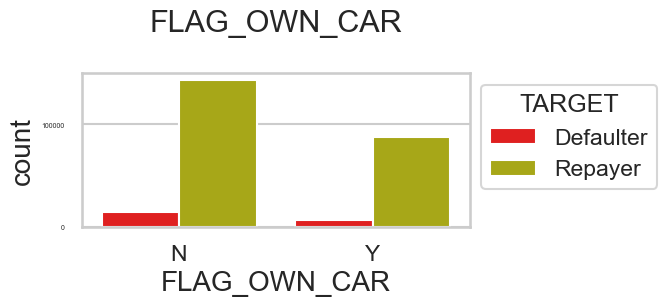

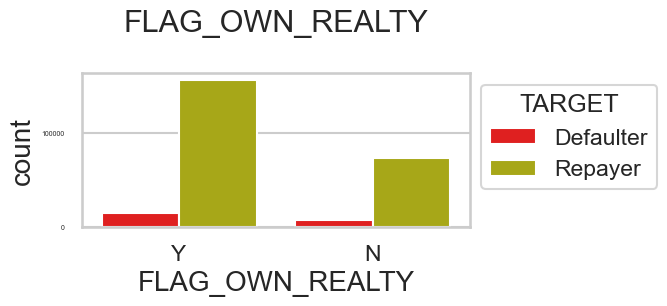

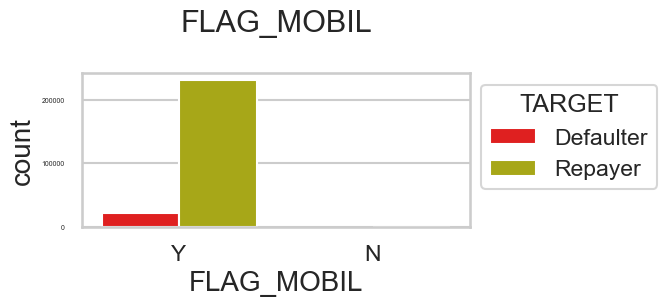

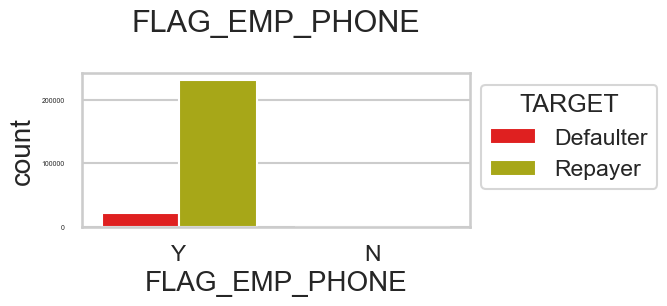

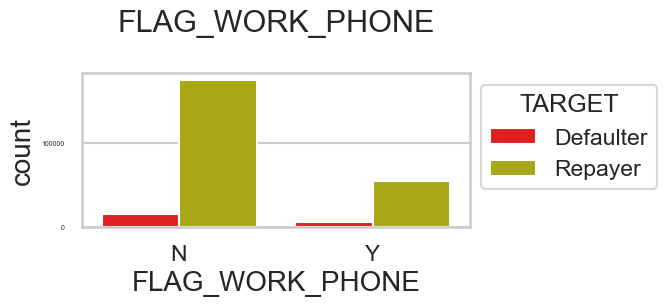

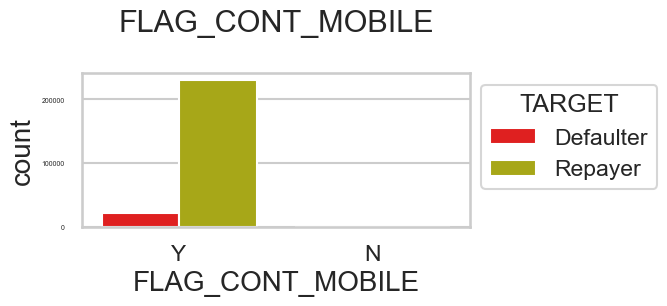

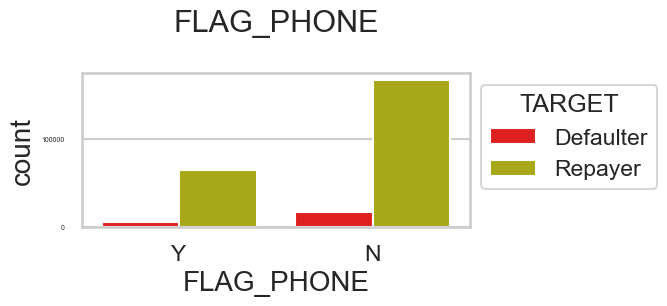

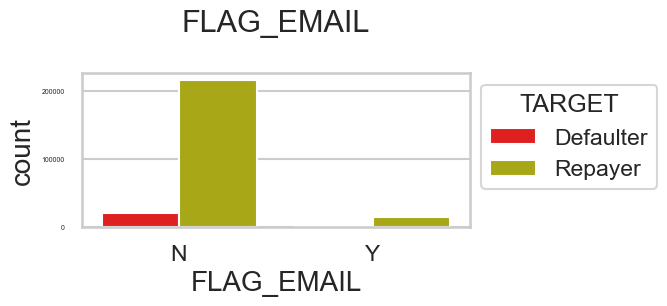

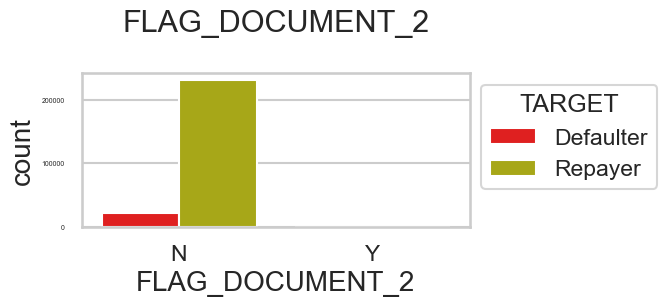

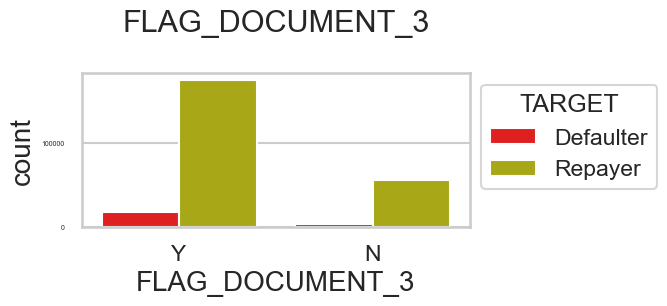

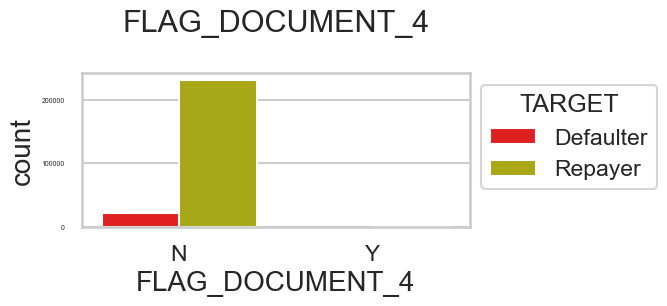

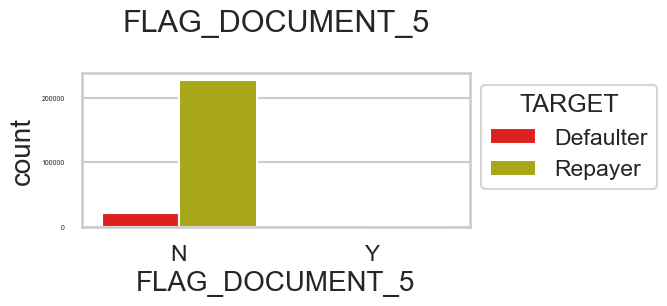

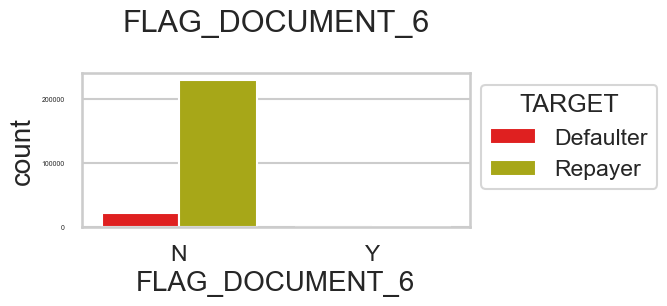

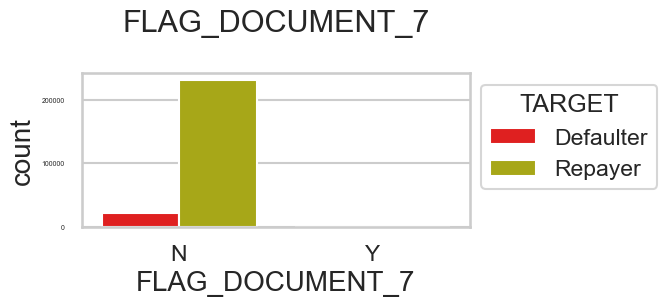

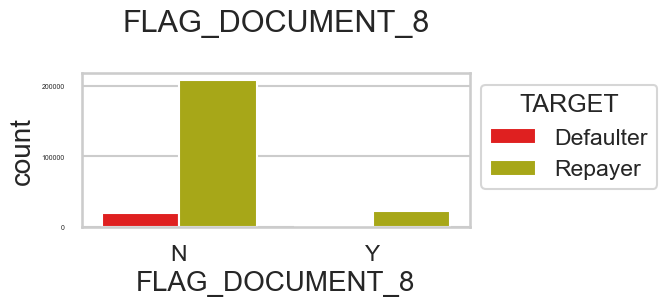

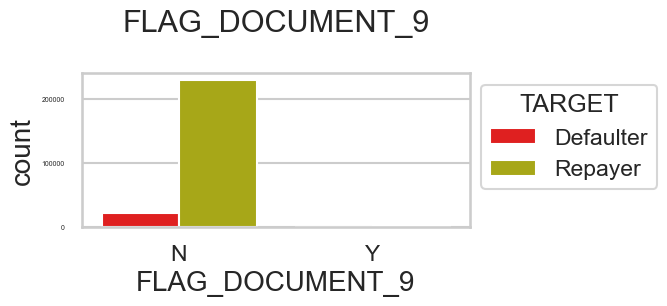

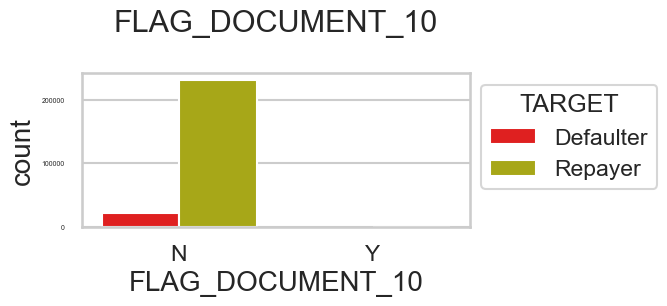

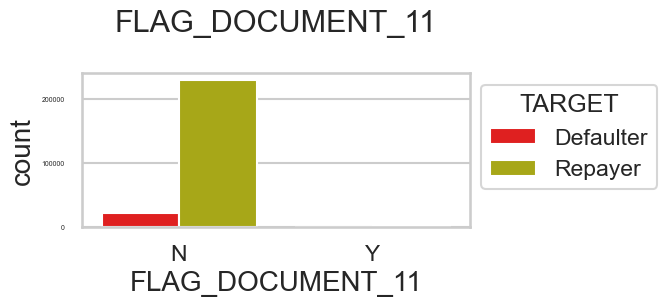

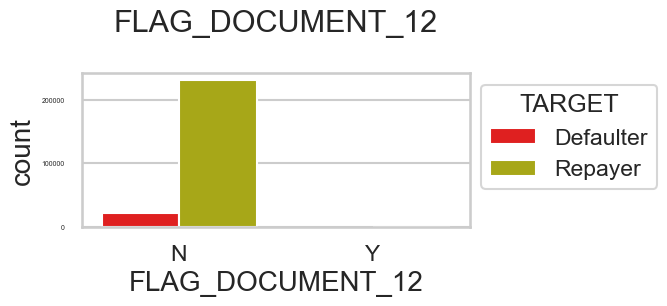

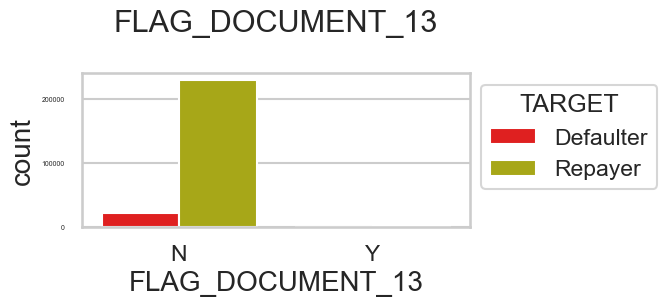

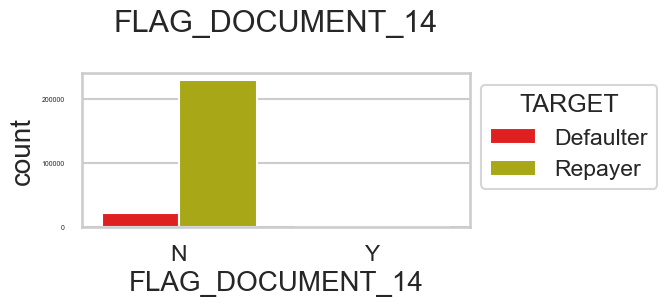

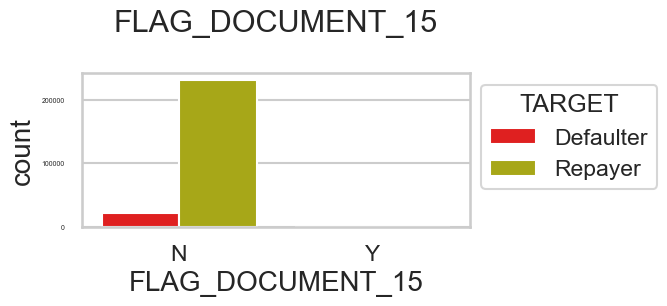

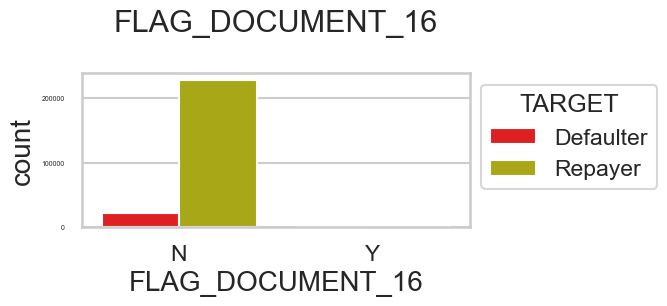

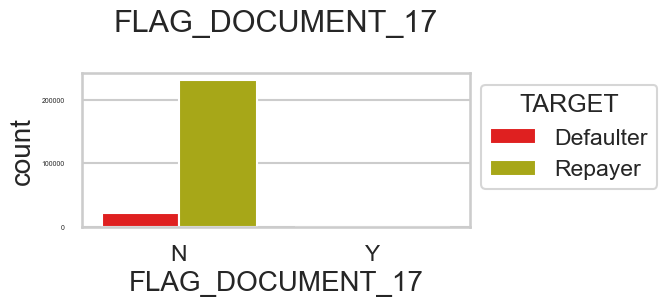

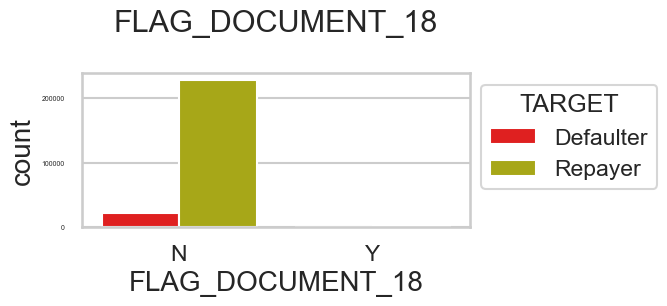

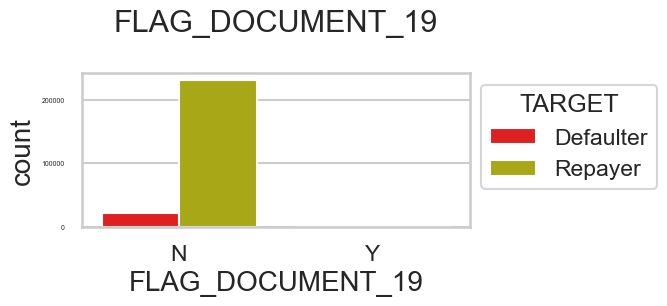

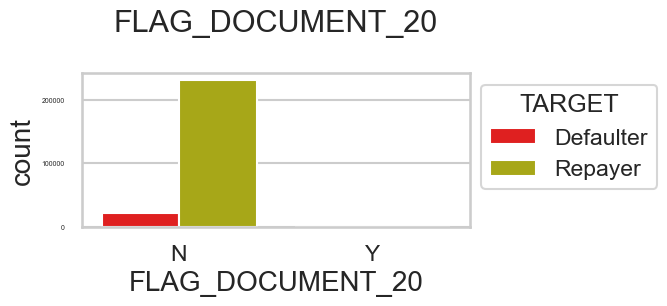

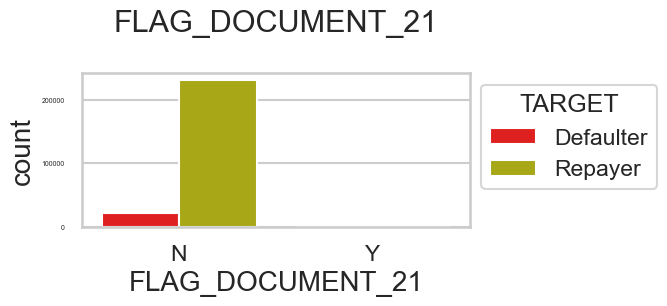

In [536]:
for i in col_flag:
     plt.figure(figsize=(5,2)) 
     ax=sns.countplot(x=i, data=ap_flg, hue=ap_flg.TARGET,palette=["r","y",])
     plt.yticks(fontsize=5) 
     plt.title(i) 
     sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))
     plt.savefig('plot image 1.png')
     plt.show() 

In [537]:
### After studying countplot of all columns containing flag word, we will drop all those columns from main dataframe ap, which have less contribution in data analysis.
relevant=['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_DOCUMENT_3','TARGET']
ap_flg.drop(relevant, axis=1 , inplace = True)

In [538]:
ap_flg.shape

(252137, 23)

In [542]:
ap.shape

(252137, 48)

In [544]:
# dropping the columns of "flag_df" dataframe that is removing more 25 columns from "appl_data" dataframe
ap.drop(columns=ap_flg,inplace=True)
ap.shape

(252137, 25)

In [546]:
## Categorical columns
cat_columns=list(ap.dtypes[ap.dtypes=='object'].index)
len(cat_columns)

10

In [548]:
cat_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

##  There are some categorical columns which contains XNA which basically denotes data not available. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [550]:
# let's find these categorical columns having these XNA values. 
# First we have 'CODE_GENDER' column
ap[ap['CODE_GENDER']=='XNA'].shape

(4, 25)

In [552]:
ap['CODE_GENDER'].value_counts()

CODE_GENDER
F      157177
M       94956
XNA         4
Name: count, dtype: int64

In [554]:
## Replacing XNA values with mode value of CODE_GENDER.
mod=ap['CODE_GENDER'].mode()[0]
ap.loc[ap['CODE_GENDER']=='XNA','CODE_GENDER']=mod
ap['CODE_GENDER'].value_counts()

CODE_GENDER
F    157181
M     94956
Name: count, dtype: int64

In [556]:
## Secondly we have ORGANIZATION_TYPE 
ap[ap['ORGANIZATION_TYPE']=='XNA'].shape

(0, 25)

In [558]:
ap['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

In [560]:
100*((ap[ap['ORGANIZATION_TYPE']=='XNA'].shape[0])/len(ap))   ## finding % of XNA values in column ORGANIZATION_TYPE

0.0

In [562]:
# Hence, dropping the rows where we have 'XNA' values in the organization type column

ap=ap.drop(ap.loc[ap['ORGANIZATION_TYPE']=='XNA'].index)
ap[ap['ORGANIZATION_TYPE']=='XNA'].shape

(0, 25)

In [125]:
ap.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67915
Self-employed             38404
Other                     16593
Medicine                  11055
Business Entity Type 2    10428
Government                10341
School                     8824
Trade: type 7              7825
Kindergarten               6850
Construction               6713
Business Entity Type 1     5955
Transport: type 4          5388
Trade: type 3              3490
Industry: type 9           3354
Industry: type 3           3265
Security                   3245
Housing                    2952
Industry: type 11          2668
Military                   2628
Bank                       2507
Agriculture                2433
Police                     2335
Transport: type 2          2193
Postal                     2136
Security Ministries        1964
Trade: type 2              1900
Restaurant                 1807
Services                   1574
University                 1300
Industry: type 7           1283
Transport: type 3     

In [564]:
ap.ORGANIZATION_TYPE.isnull().sum()

0

In [566]:
ap

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307504      456248       0         Cash loans           F            N   
307506      456251       0         Cash loans           M            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0         202500.00   406597.50   
1                    N             0         270000.00  1293502.50   
2                    Y             0          67500.00   135000.00   
3                    Y             0         135000.00   312682.50   
4                    Y             0         121500.00   513000.00   
...                ...           ...               ...         ...   
307504               Y             0         153000.00   331920.00   
307506               N             0         157500.00   254700.00   
307508               Y             0         153000.00   677664.00   
307509               Y             0         171000.00   370107.00   
307510               N             0         157500.00   675000.00   

        AMT_ANNUITY      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          24700.50               Working  Secondary / secondary special   
1          35698.50         State servant               Higher education   
2           6750.00               Working  Secondary / secondary special   
3          29686.50               Working  Secondary / secondary special   
4          21865.50               Working  Secondary / secondary special   
...             ...                   ...                            ...   
307504     16096.50               Working  Secondary / secondary special   
307506     27558.00               Working  Secondary / secondary special   
307508     29979.00               Working               Higher education   
307509     20205.00  Commercial associate  Secondary / secondary special   
307510     49117.50  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0       Single / not married  House / apartment                        0.02   
1                    Married  House / apartment                        0.00   
2       Single / not married  House / apartment                        0.01   
3             Civil marriage  House / apartment                        0.01   
4       Single / not married  House / apartment                        0.03   
...                      ...                ...                         ...   
307504             Separated  House / apartment                        0.02   
307506             Separated       With parents                        0.03   
307508             Separated  House / apartment                        0.01   
307509               Married  House / apartment                        0.01   
307510               Married  House / apartment                        0.05   

        Age in years  Employed in years  FLAG_WORK_PHONE  FLAG_PHONE  \
0              26.00               -637                0           1   
1              46.00              -1188                0           1   
2              52.00               -225                1           1   
3              52.00              -3039                0           0   
4              55.00              -3038                0

### Derived metrics are metrics that a report analyst can create based on existing metrics on the report. 

In [568]:
# Creating bins for AMT_INCOME_TOTAL

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

ap['AMT_INCOME_RANGE']=pd.cut(ap['AMT_INCOME_TOTAL'],bins,labels=slot)
ap['AMT_INCOME_RANGE'].value_counts()

AMT_INCOME_RANGE
125000-150000       39819
200000-225000       35994
100000-125000       34851
75000,100000        29612
150000-175000       29296
175000-200000       25892
50000-75000         12077
250000-275000       11485
225000-250000        6483
300000-325000        6169
350000-375000        4185
275000-300000        3749
425000-450000        2863
500000 and above     2543
25000-50000          1982
325000-350000        1952
400000-425000        1652
375000-400000        1132
475000-500000         282
450000-475000         119
0-25000                 0
Name: count, dtype: int64

In [570]:
# Creating bins for AMT_CREDIT

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

ap['AMT_CREDIT_RANGE']=pd.cut(ap['AMT_CREDIT'],bins=bins,labels=slots)

In [572]:
ap['AMT_CREDIT_RANGE'].value_counts()

AMT_CREDIT_RANGE
900000 and above    50717
250000-300000       24961
500000-550000       18434
200000-250000       17502
400000-450000       15854
150000-200000       14867
0-150000            13502
300000-350000       13487
650000-700000       12142
450000-500000       11254
750000-800000        9770
550000-600000        9489
800000-850000        9439
850000-900000        9100
350000-400000        8399
600000-650000        7571
700000-750000        5649
Name: count, dtype: int64

In [574]:
ap.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   
1               N             0         270000.00  1293502.50     35698.50   
2               Y             0          67500.00   135000.00      6750.00   
3               Y             0         135000.00   312682.50     29686.50   
4               Y             0         121500.00   513000.00     21865.50   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Age in years  \
0  House / apartment                        0.02         26.00   
1  House / apartment                        0.00         46.00   
2  House / apartment                        0.01         52.00   
3  House / apartment                        0.01         52.00   
4  House / apartment                        0.03         55.00   

   Employed in years  FLAG_WORK_PHONE  FLAG_PHONE  CNT_FAM_MEMBERS  \
0               -637                0           1             1.00   
1              -1188                0           1             2.00   
2               -225                1           1             1.00   
3              -3039                0           0             2.00   
4              -3038                0           0             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  FLAG_DOCUMENT_3  \
0                  WEDNESDAY  Business Entity Type 3                1   
1                     MONDAY                  School                1   
2                     MONDAY              Government                0   
3                  WEDNESDAY  Business Entity Type 3                1   
4                   THURSDAY                Religion                0   

  AMT_INCOME_RANGE  AMT_CREDIT_RANGE  
0    200000-225000     400000-450000  
1    250000-275000  900000 and above  
2      50000-75000          0-150000  
3    125000-150000     300000-350000  
4    100000-125000     500000-550000

In [576]:
# Dividing the dataset into two datasets of  target='Defaulter'(client with payment difficulties) and target='Repayer'(all other)

ap_target0=ap.loc[ap["TARGET"]==0]   
ap_target1=ap.loc[ap["TARGET"]==1]

In [580]:
numeric_columns1=list(ap.dtypes[ap.dtypes!='object'].index)
numeric_columns1

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'Age in years',
 'Employed in years',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_DOCUMENT_3',
 'AMT_INCOME_RANGE',
 'AMT_CREDIT_RANGE']

In [582]:
ap_target0=ap_target0[numeric_columns1]
ap_target0

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1           100003       0             0         270000.00  1293502.50   
2           100004       0             0          67500.00   135000.00   
3           100006       0             0         135000.00   312682.50   
4           100007       0             0         121500.00   513000.00   
5           100008       0             0          99000.00   490495.50   
...            ...     ...           ...               ...         ...   
307503      456247       0             0         112500.00   345510.00   
307504      456248       0             0         153000.00   331920.00   
307506      456251       0             0         157500.00   254700.00   
307508      456253       0             0         153000.00   677664.00   
307510      456255       0             0         157500.00   675000.00   

        AMT_ANNUITY  REGION_POPULATION_RELATIVE  Age in years  \
1          35698.50                        0.00         46.00   
2           6750.00                        0.01         52.00   
3          29686.50                        0.01         52.00   
4          21865.50                        0.03         55.00   
5          27517.50                        0.04         46.00   
...             ...                         ...           ...   
307503     17770.50                        0.02         33.00   
307504     16096.50                        0.02         46.00   
307506     27558.00                        0.03         26.00   
307508     29979.00                        0.01         41.00   
307510     49117.50                        0.05         46.00   

        Employed in years  FLAG_WORK_PHONE  FLAG_PHONE  CNT_FAM_MEMBERS  \
1                   -1188                0           1             2.00   
2                    -225                1           1             1.00   
3                   -3039                0           0             2.00   
4                   -3038                0           0             1.00   
5                   -1588                1           1             2.00   
...                   ...              ...         ...              ...   
307503               -399                0           0             1.00   
307504              -7258                0           0             1.00   
307506               -236                0           0             1.00   
307508              -7921                0           0             1.00   
307510              -1262                1           1             2.00   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  FLAG_DOCUMENT_3  \
1                          1                            1                1   
2                          2                            2                0   
3                          2                            2                1   
4                          2                            2                0   
5                          2                            2                1   
...                      ...                          ...              ...   
307503                     2                            2                1   
307504                     2                            2                1   
307506                     1                            1                0   
307508                     3                            3                1   
307510                     1                            1                1   

       AMT_INCOME_RANGE  AMT_CREDIT_RANGE  
1         250000-275000  900000 and above  
2           50000-75000          0-150000  
3         125000-150000     300000-350000  
4         100000-125000     500000-550000  
5          75000,100000     450000-500000  
...                 ...               ...  
307503    100000-125000     300000-350000  
307504    150000-175000     300000-350000  
307506    150000-175000     250000-300000  
307508    150000-175000     650000-700000  
307510    150000

In [584]:
ap_target1=ap_target1[numeric_columns1]

In [586]:
len(ap_target0)

230302

In [588]:
len(ap_target1)

21835

In [590]:
# Calculating Imbalance percentage
# Since the majority is target0 and minority is target1

round(len(ap_target0)/len(ap_target1),2)

10.55

### Observation 3: 
a) Firstly separated numeric and categorical columns and observed them.
b) Dropped unwanted columns from dataframe just by observing them.
c) Formatting DAYS_BIRTH column in years and renaming it as Age in years.
d) Formatting DAYS_EMPLOYED column in years and renaming it as Employed in years.
e) Removing outliers in column Employed in years. Capping the Employed in years equals to 1001.00 to second highest occuring value i.e 1.0. Dropping 
   all that rows where Employed in years>35 years, as providing loan at this age might increase risks.
f) We can use terminology of banks Defaulter and Repayer. So, replace "0" as 'Repayer' and "1" as 'Defaulter' for TARGET column.
g) We have treated all Flag word related columns and formatted the columns by replacing columns values with "1" as Y being TRUE and "0" as N being 
   False. 
h) After studying countplot of all columns containing flag word, we will drop all those columns from main dataframe ap, which have less contribution in 
   data analysis.
i)  Here we see that Gender column contain only 4 XNA values, so we replace those values with mode value, as it will have no effects on data sets 
    analysis. But organisation type has approx 18% XNA values, which cannot be replaced by any other data. These data are important because they will 
    help in deciding the financial condition of client applying for loan.So discarding these client from the column will be a correct approach. 
j) Derived metrics of columns AMT_INCOME_TOTAL, AMT_CREDIT have been created for further analysis. We have created three metrics here and on the basis 
   of these we will do univariate analysis, bivariate analysis and other type of analysis. Here we find imbalance ratio of 0.10 which shows that 90%
   clients are more intend to pay their installments on time.

### Univariate Analysis

In [596]:
ap.head(1)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Age in years  \
0  House / apartment                        0.02         26.00   

   Employed in years  FLAG_WORK_PHONE  FLAG_PHONE  CNT_FAM_MEMBERS  \
0               -637                0           1             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  FLAG_DOCUMENT_3  \
0                  WEDNESDAY  Business Entity Type 3                1   

  AMT_INCOME_RANGE AMT_CREDIT_RANGE  
0    200000-225000    400000-450000

### Countplot

In [216]:
# Distribution of income range

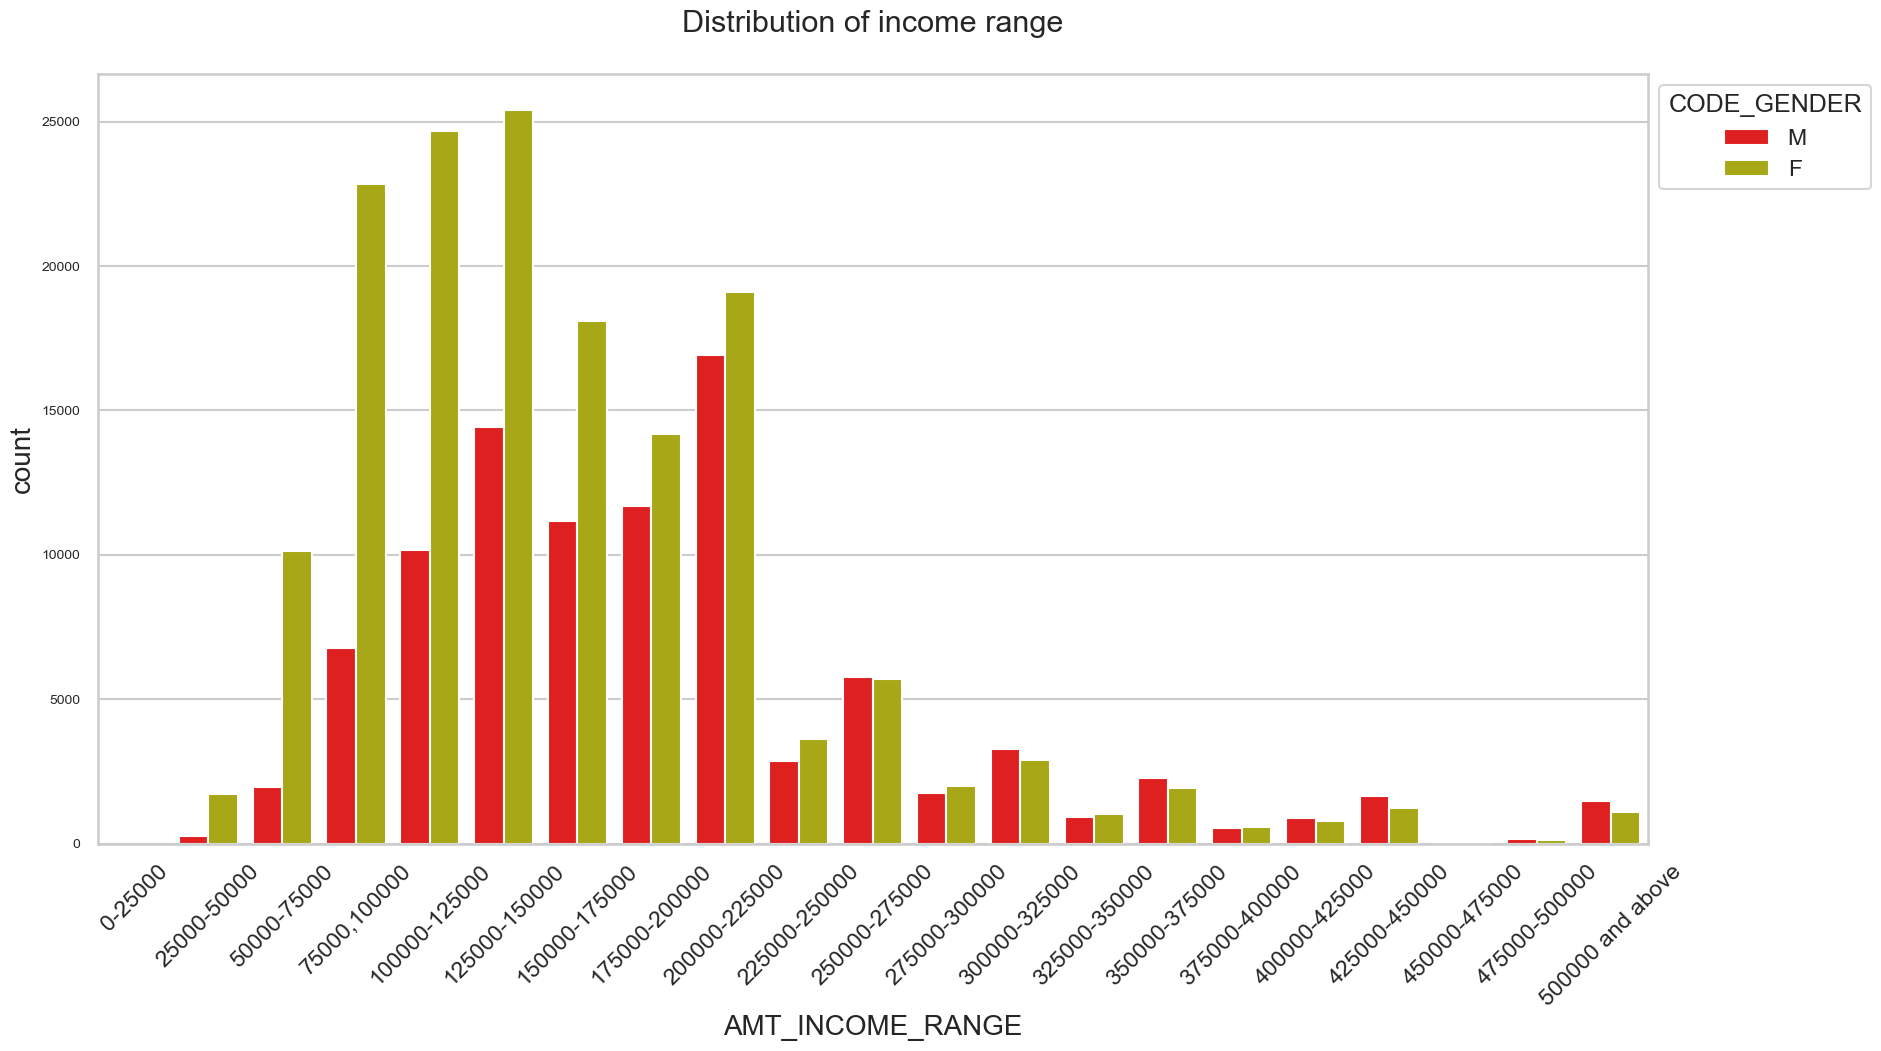

In [598]:
plt.figure(figsize=(20,10)) 
ax=sns.countplot(x=ap.AMT_INCOME_RANGE, data=ap, hue=ap.CODE_GENDER,palette=["r","y",])
plt.yticks(fontsize=10) 
plt.title('Distribution of income range')
plt.xticks(rotation=45)
sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))
plt.savefig('plot image 2.png')
plt.show()     

### Observation 4: 
a) Female has more counts than male.
b) Male have highest count in Income range from 200000 to 225000 fro and famale have highest in  125000 to 150000.
c) Very less count for income range 0-25000 and 400000 and above.

In [ ]:
## Distribution of credit range

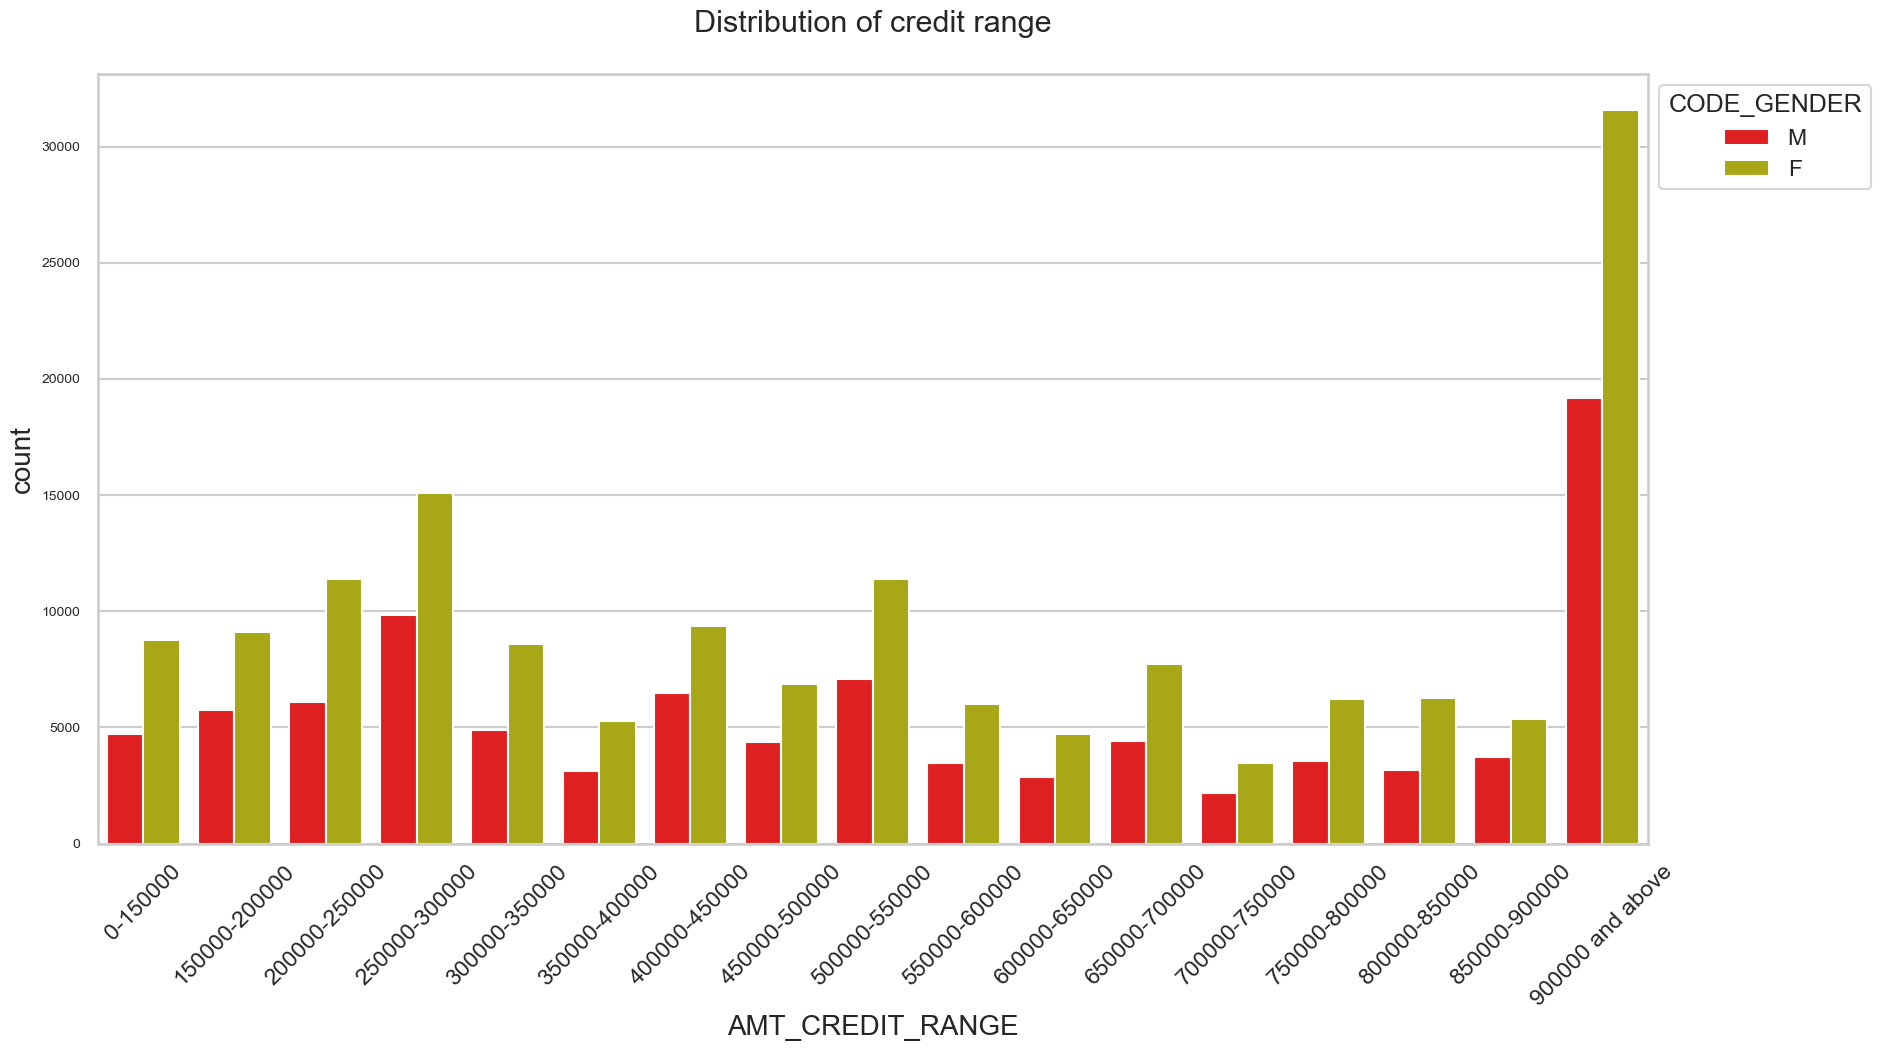

In [600]:
plt.figure(figsize=(20,10)) 
ax=sns.countplot(x=ap.AMT_CREDIT_RANGE, data=ap, hue=ap.CODE_GENDER,palette=["r","y",])
plt.yticks(fontsize=10) 
plt.title('Distribution of credit range')
plt.xticks(rotation=45)
sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))
plt.savefig('plot image 3.png')
plt.show()     

### Observation 5: 
a) Female has more credit counts than male.
b) Male and famale both have highest  credit in range 900000 and above.
c) Count for credit are symmetrical distributed from range 0 to 900000.

In [ ]:
# # Plotting for NAME_INCOME_TYPE

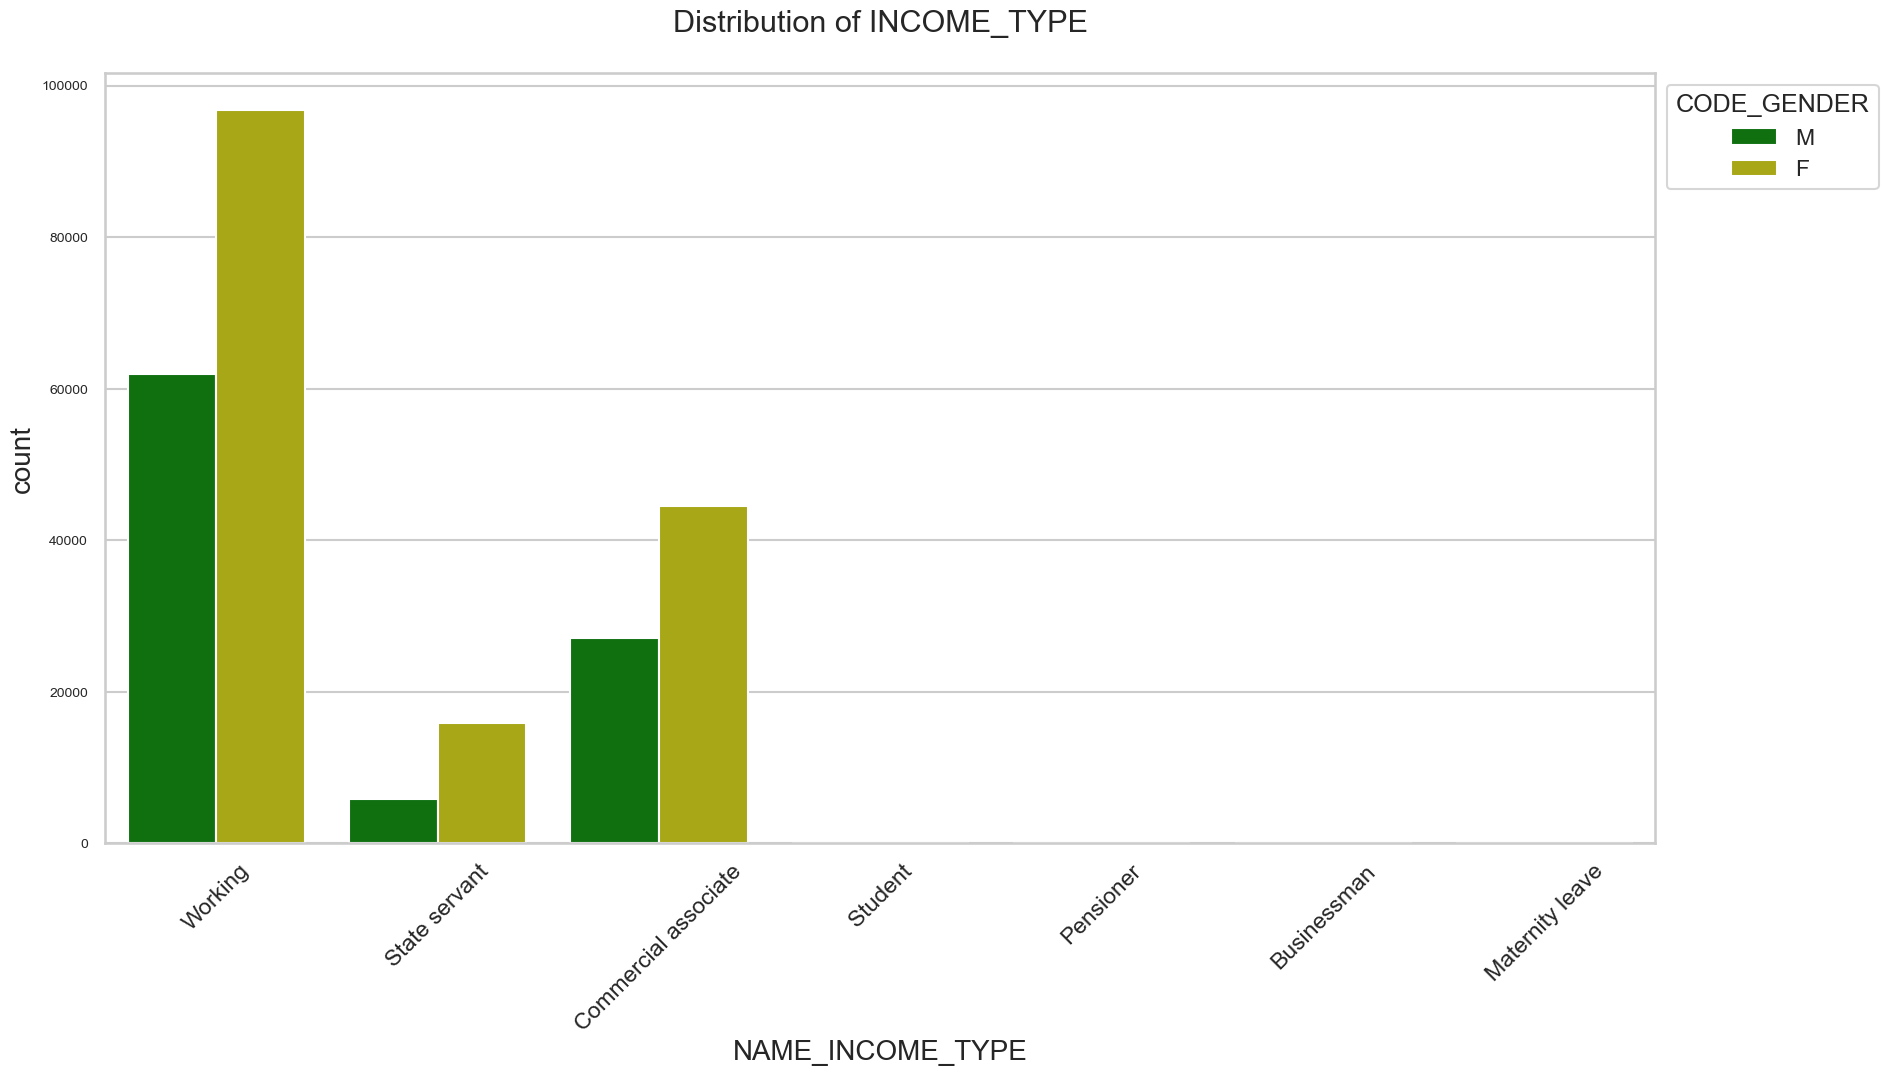

In [602]:
plt.figure(figsize=(20,10)) 
ax=sns.countplot(x=ap.NAME_INCOME_TYPE, data=ap, hue=ap.CODE_GENDER,palette=["g","y",])
plt.yticks(fontsize=10) 
plt.title('Distribution of INCOME_TYPE')
plt.xticks(rotation=45)
sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))
plt.savefig('plot image 4.png')
plt.show()  

In [604]:
ap.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
State servant            21703
Student                     18
Pensioner                   10
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [ ]:
### Observation 6: 
a) Again Female has more likely to apply for loan as compared to male. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’
b) For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
c) Count for credit are symmetrical distributed from range 0 to 900000.

In [ ]:
# Plotting for Contract type

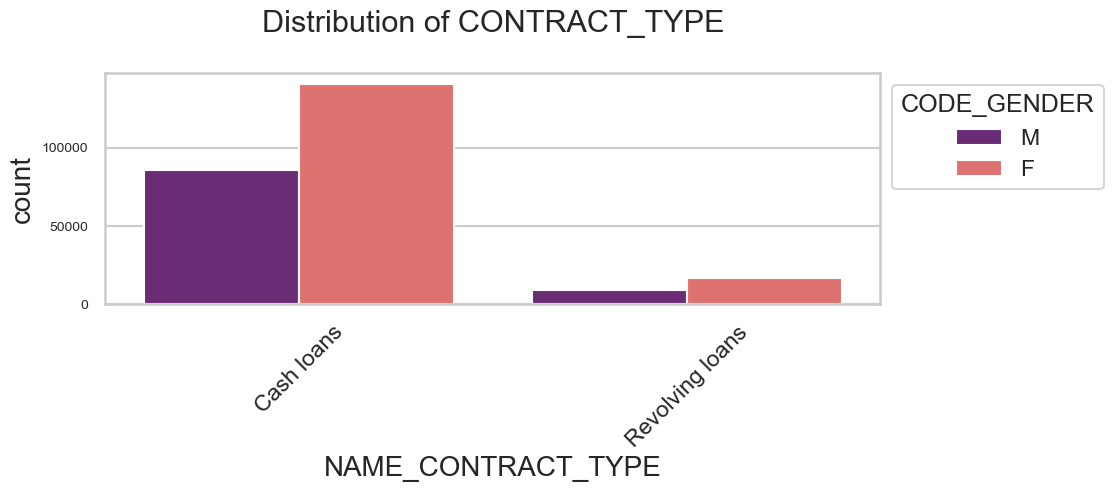

In [606]:
plt.figure(figsize=(10,3)) 
ax=sns.countplot(x=ap.NAME_CONTRACT_TYPE, data=ap, hue=ap.CODE_GENDER,palette='magma')
plt.yticks(fontsize=10) 
plt.title('Distribution of CONTRACT_TYPE')
plt.xticks(rotation=45)
sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))
plt.savefig('plot image 5.png')
plt.show()  

In [ ]:
### Observation 7: 
a) Contract type cash loans is having higher number of credits than Revolving loans.
b) For cash loans Females lead in applying credits.

# Plotting for Organization type

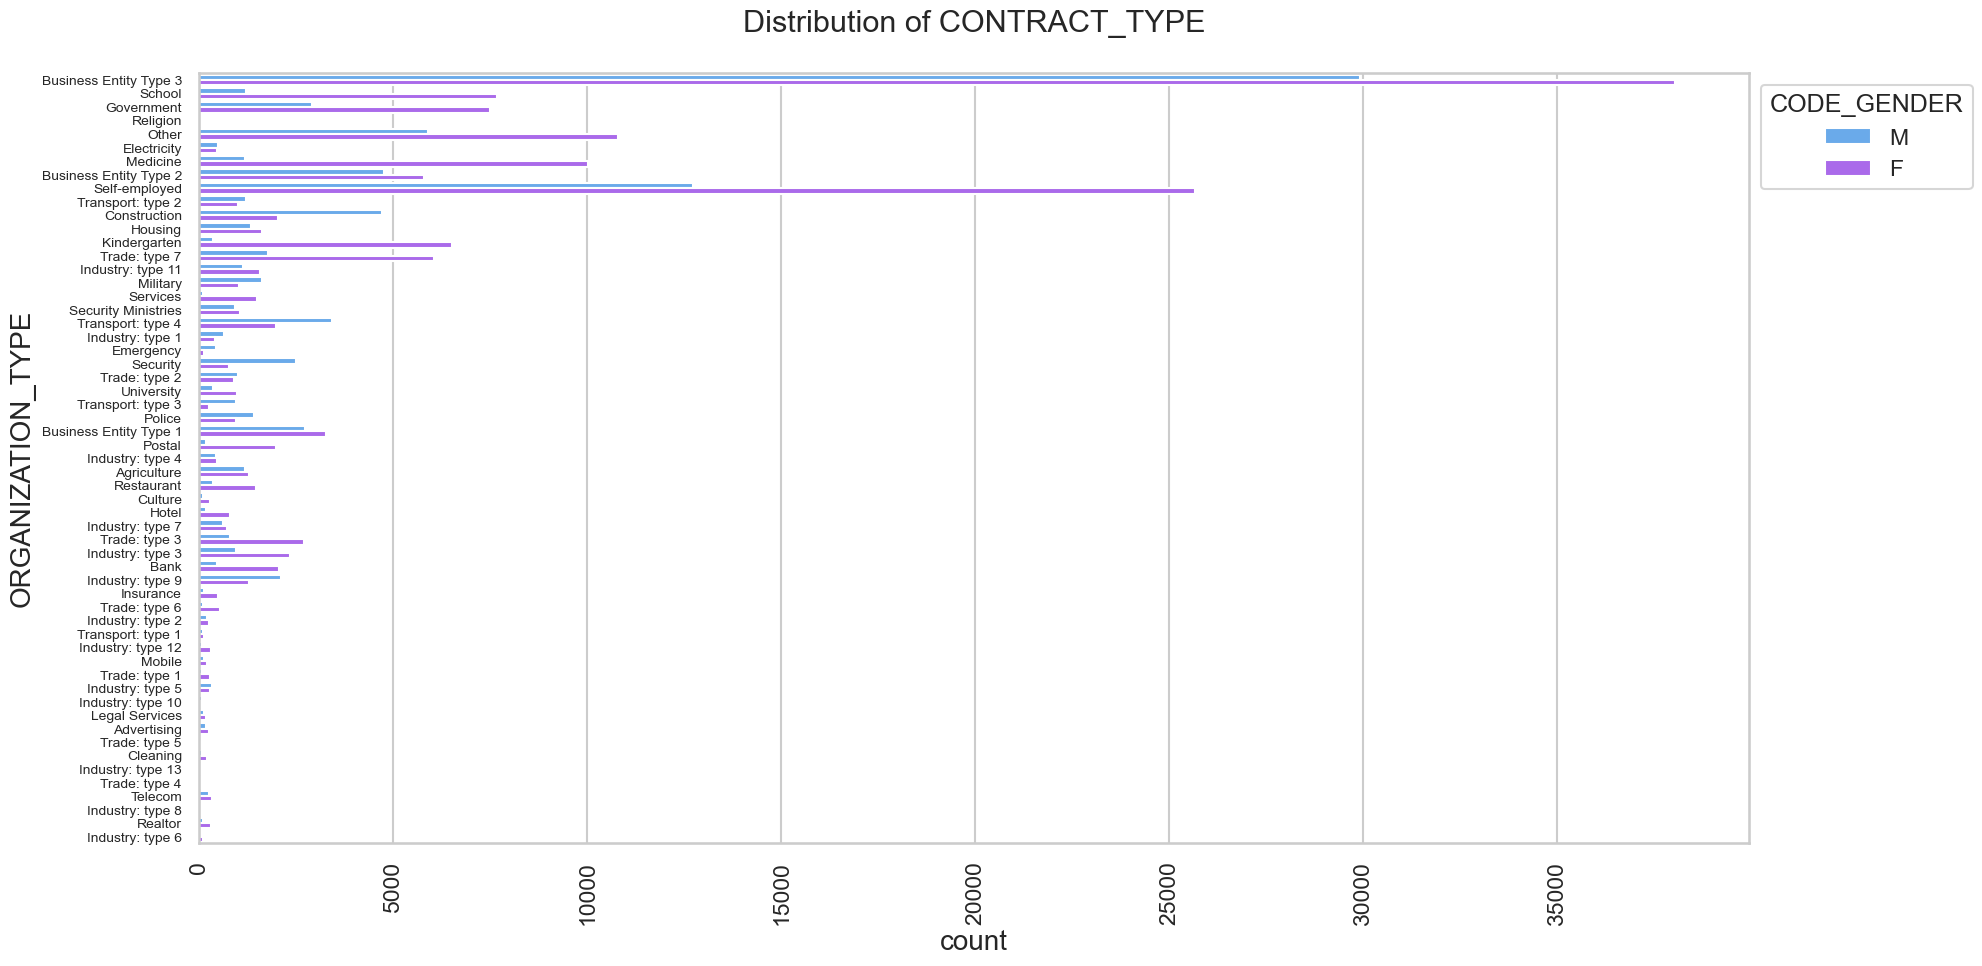

In [608]:
plt.figure(figsize=(20,10)) 
ax=sns.countplot(y=ap.ORGANIZATION_TYPE,data=ap, hue=ap.CODE_GENDER,palette='cool')
plt.yticks(fontsize=10) 
plt.title('Distribution of CONTRACT_TYPE')
plt.xticks(rotation=90)
sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))
plt.savefig('plot image 6.png')
plt.show()  

### Observation 8:
 Top 5 Clients which have applied for credits are from organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.

### Bivariate Analysis

### Box Plot

### NAME_EDUCATION_TYPE, AMT_CREDIT and NAME_FAMILY_STATUS for both defaulters and repayers

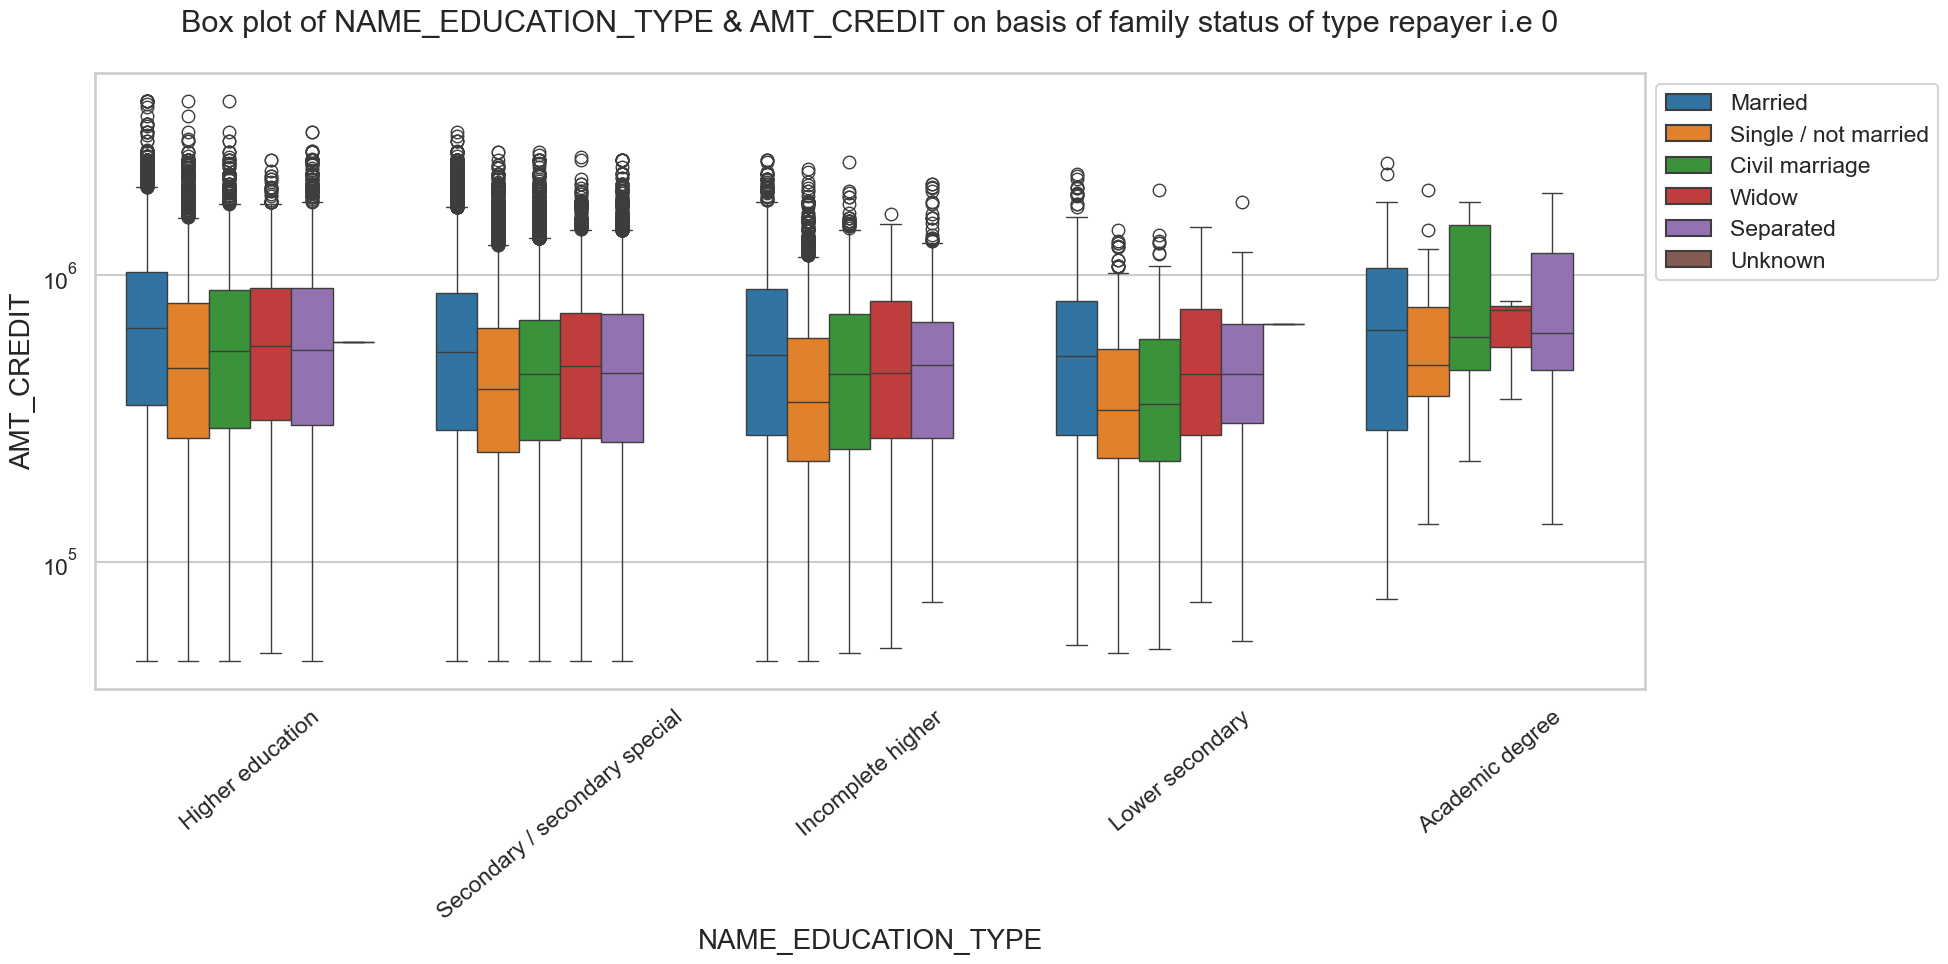

In [610]:
plt.figure(figsize=(20,8))
sns.boxplot(data=ap[ap.TARGET==0],x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS')
plt.title('Box plot of NAME_EDUCATION_TYPE & AMT_CREDIT on basis of family status of type repayer i.e 0')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.yscale('log')
plt.xticks(rotation=40)
plt.ylabel('AMT_CREDIT')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('plot image 7.png')
plt.show()

### Observation 9: 
From the above box plot we can conclude that people with Family status of 'Civil marriage', 'Married' and 'Separated' of Academic degree education are having higher number of credits than others. Also, higher education of people with family status of 'Married', 'single' and 'Civil marriage' has more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

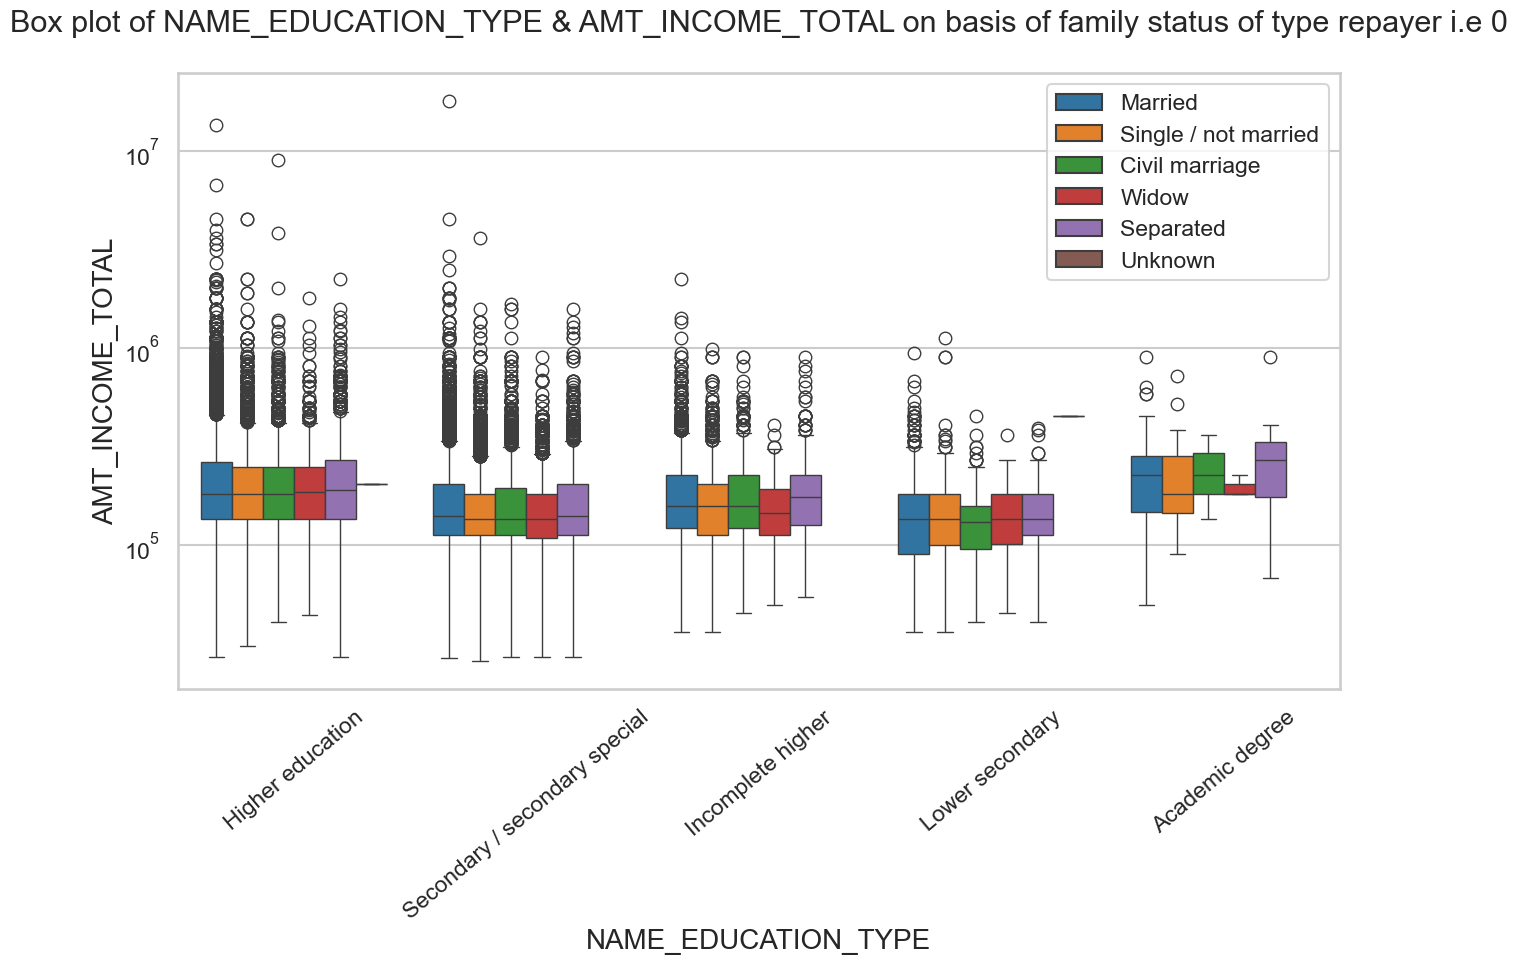

In [612]:
plt.figure(figsize=(15,8))
sns.boxplot(data=ap[ap.TARGET==0],x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS')
plt.title('Box plot of NAME_EDUCATION_TYPE & AMT_INCOME_TOTAL on basis of family status of type repayer i.e 0')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.xticks(rotation=40)
plt.yscale('log')
plt.ylabel('AMT_INCOME_TOTAL')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('plot image 8.png')
plt.show()

### Observation 10: 
a) From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less
   outlier exist for Academic degree but their income amount is little higher that of Higher education.b) 
People with Lower secondary education and civil marriage have less income than others.

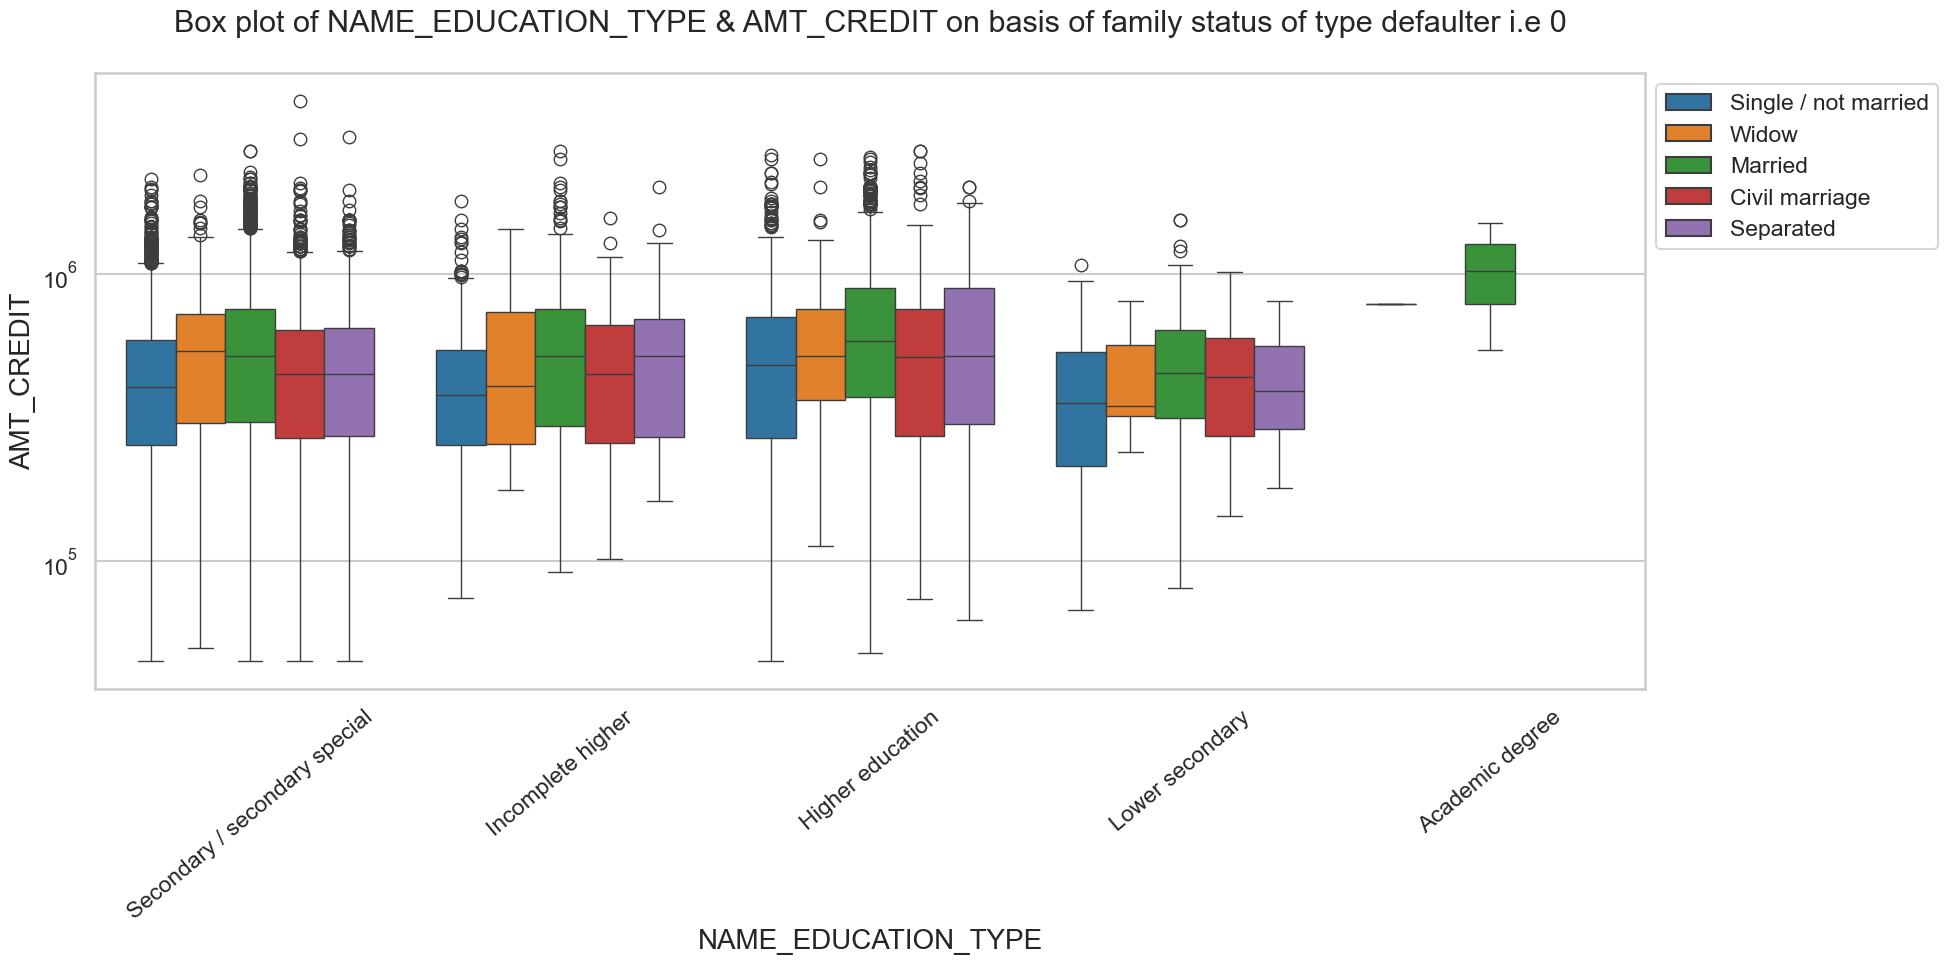

In [614]:
plt.figure(figsize=(20,8))
sns.boxplot(data=ap[ap.TARGET==1],x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS')
plt.title('Box plot of NAME_EDUCATION_TYPE & AMT_CREDIT on basis of family status of type defaulter i.e 0')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.yscale('log')
plt.xticks(rotation=40)
plt.ylabel('AMT_CREDIT')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('plot image 10.png')
plt.show()

### Observation 11:
a) From the above box plot we can say that people with family status of 'Civil marriage','Married' and 'Separated' of Higher education are 
   having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
b) Lower education has the lowest median value in all section of family status.


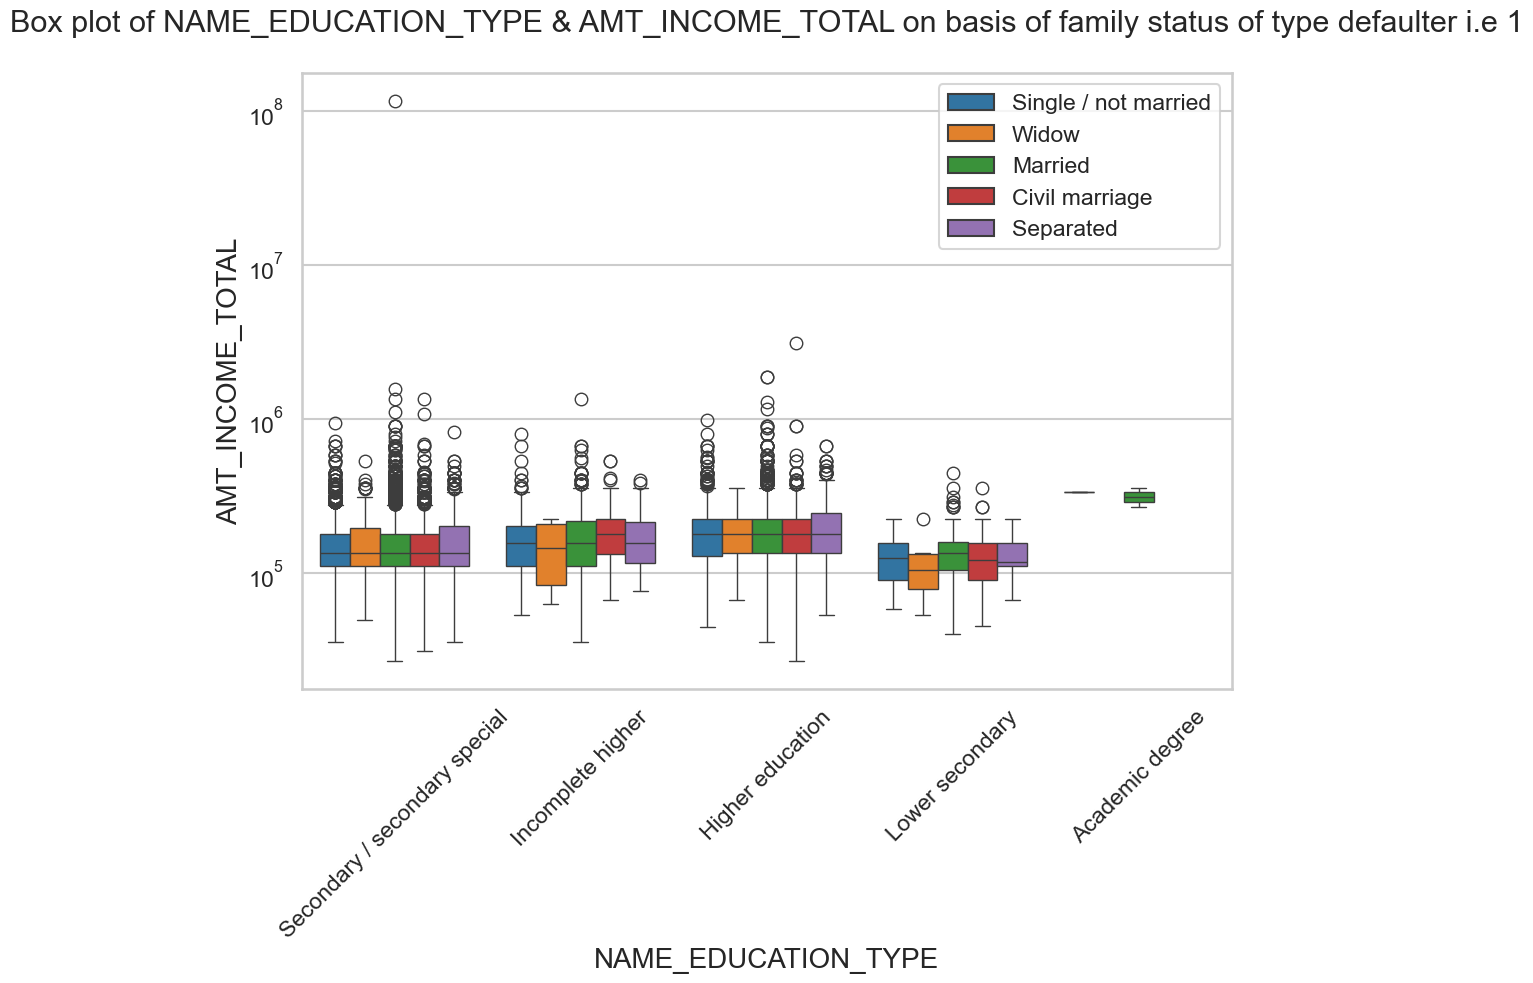

In [616]:
plt.figure(figsize=(12,8))
sns.boxplot(data=ap[ap.TARGET==1],x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',orient='v')
plt.title('Box plot of NAME_EDUCATION_TYPE & AMT_INCOME_TOTAL on basis of family status of type defaulter i.e 1')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.yscale('log')
plt.xticks(rotation=45)
plt.ylabel('AMT_INCOME_TOTAL')
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('plot image 11.png')
plt.show()

### Observation 12:
a) 
From above boxplot for Education type 'Higher education' the income amount is mostly equal for almost all family status. Less outliers exist f
   r Academic degree and their income amount is a bit higher that of Higher educationb) .
Lower secondary educated people are having less income amount than oth.ers

### Multivariate Analysis

### Correlation matrix & Heat Map

In [177]:
# Finding some correlation for numerical columns for both Target='Defaulter'(client with payment difficulties) and target='Repayer'(all other)
# For further analysis replace 'Defaulter' as 1 and 'Repayer as 0'
target_defaulter_corr=ap_target1.iloc[0:,2:-2]
target_repayer_corr=ap_target0.iloc[0:,2:-2]

target_defaulter=target_defaulter_corr.corr(method='spearman')
target_repayer=target_repayer_corr.corr(method='spearman')

In [179]:
target_defaulter

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                         1.00             -0.04        0.00   
AMT_INCOME_TOTAL                    -0.04              1.00        0.36   
AMT_CREDIT                           0.00              0.36        1.00   
AMT_ANNUITY                          0.02              0.43        0.81   
REGION_POPULATION_RELATIVE          -0.03              0.06        0.04   
Age in years                        -0.17              0.10        0.20   
Employed in years                   -0.01              0.05        0.11   
FLAG_WORK_PHONE                     -0.00             -0.14       -0.08   
FLAG_PHONE                          -0.03             -0.02       -0.01   
CNT_FAM_MEMBERS                      0.85             -0.03        0.06   
REGION_RATING_CLIENT                 0.05             -0.16       -0.05   
REGION_RATING_CLIENT_W_CITY          0.05             -0.18       -0.06   
FLAG_DOCUMENT_3                      0.01             -0.05        0.11   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                        0.02                       -0.03   
AMT_INCOME_TOTAL                    0.43                        0.06   
AMT_CREDIT                          0.81                        0.04   
AMT_ANNUITY                         1.00                        0.03   
REGION_POPULATION_RELATIVE          0.03                        1.00   
Age in years                        0.10                        0.04   
Employed in years                   0.06                        0.02   
FLAG_WORK_PHONE                    -0.08                       -0.02   
FLAG_PHONE                         -0.02                        0.05   
CNT_FAM_MEMBERS                     0.06                       -0.02   
REGION_RATING_CLIENT               -0.06                       -0.34   
REGION_RATING_CLIENT_W_CITY        -0.08                       -0.35   
FLAG_DOCUMENT_3                     0.11                       -0.03   

                             Age in years  Employed in years  FLAG_WORK_PHONE  \
CNT_CHILDREN                        -0.17              -0.01            -0.00   
AMT_INCOME_TOTAL                     0.10               0.05            -0.14   
AMT_CREDIT                           0.20               0.11            -0.08   
AMT_ANNUITY                          0.10               0.06            -0.08   
REGION_POPULATION_RELATIVE           0.04               0.02            -0.02   
Age in years                         1.00               0.26            -0.05   
Employed in years                    0.26               1.00             0.03   
FLAG_WORK_PHONE                     -0.05               0.03             1.00   
FLAG_PHONE                           0.02               0.05             0.34   
CNT_FAM_MEMBERS                     -0.08               0.04             0.02   
REGION_RATING_CLIENT                -0.05               0.00             0.01   
REGION_RATING_CLIENT_W_CITY         -0.05               0.00             0.02   
FLAG_DOCUMENT_3                      0.05               0.05             0.01   

                             FLAG_PHONE  CNT_FAM_MEMBERS  \
CNT_CHILDREN                      -0.03             0.85   
AMT_INCOME_TOTAL                  -0.02            -0.03   
AMT_CREDIT                        -0.01             0.06   
AMT_ANNUITY                       -0.02             0.06   
REGION_POPULATION_RELATIVE         0.05            -0.02   
Age in years                       0.02            -0.08   
Employed in years                  0.05             0.04   
FLAG_WORK_PHONE                    0.34             0.02   
FLAG_PHONE                         1.00            -0.00   
CNT_FAM_MEMBERS                   -0.00             1.00   
REGION_RATING_CLIENT              -0.06             0.05   
REGION_RATING_CLIENT_W_CITY       -0.05             0.05   
FLAG_DOCUMENT_3                   -0.02             0.

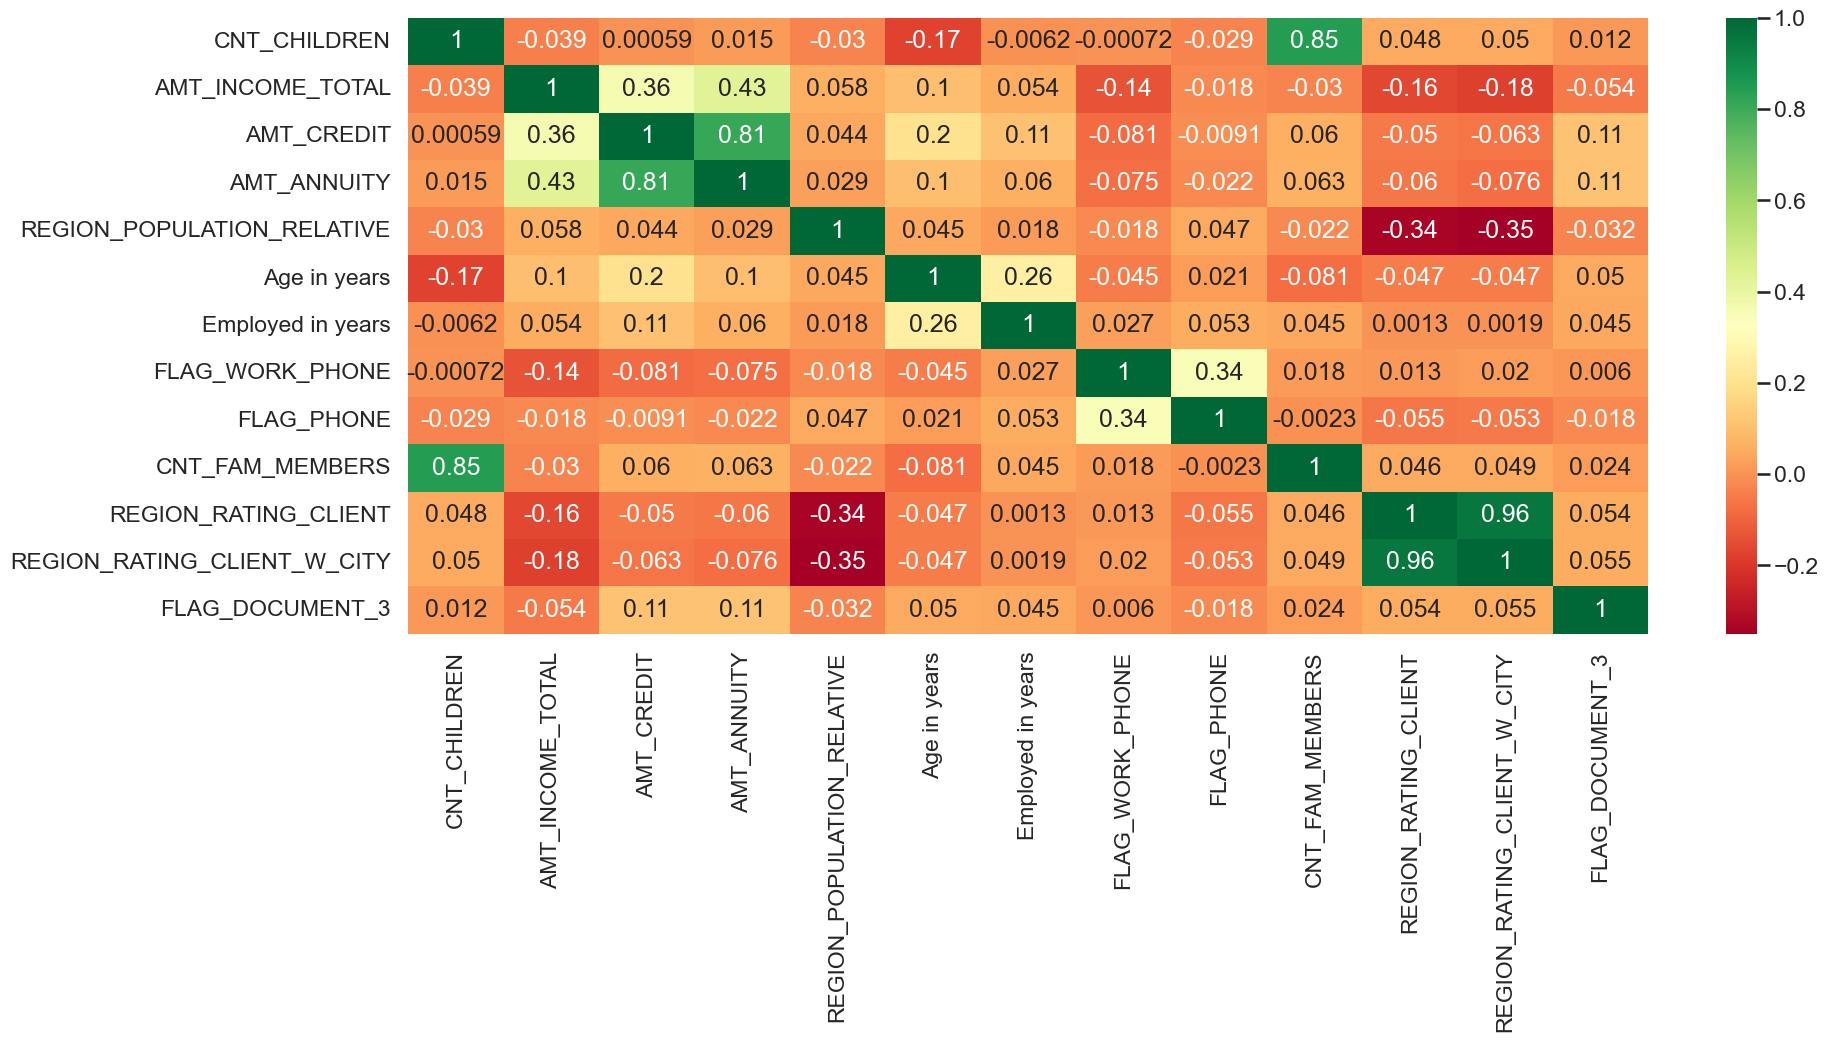

In [618]:
plt.figure(figsize=(20,8))
sns.heatmap(data=target_defaulter,cmap="RdYlGn",annot=True)
plt.savefig('plot image 12.png')
plt.show()

# Observation 13:a) Credit amount is inversely proportional to FLAG_PHONE, FLAG_WORK_PHONE, REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY.
b) Credit amount has low positive correlation with low age client. 
c) The income is also moderate in densely populated area.
d) Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
e) People have less children in densely populated area.
f) Credit and annuity amount has low positive correlation in densely populated area.

In [183]:
target_repayer

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                         1.00             -0.02       -0.02   
AMT_INCOME_TOTAL                    -0.02              1.00        0.40   
AMT_CREDIT                          -0.02              0.40        1.00   
AMT_ANNUITY                         -0.01              0.47        0.83   
REGION_POPULATION_RELATIVE          -0.03              0.11        0.06   
Age in years                        -0.26              0.05        0.17   
Employed in years                   -0.03              0.06        0.10   
FLAG_WORK_PHONE                     -0.01             -0.12       -0.05   
FLAG_PHONE                          -0.03             -0.00        0.02   
CNT_FAM_MEMBERS                      0.85             -0.01        0.05   
REGION_RATING_CLIENT                 0.04             -0.22       -0.09   
REGION_RATING_CLIENT_W_CITY          0.03             -0.24       -0.10   
FLAG_DOCUMENT_3                     -0.01             -0.09        0.13   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                       -0.01                       -0.03   
AMT_INCOME_TOTAL                    0.47                        0.11   
AMT_CREDIT                          0.83                        0.06   
AMT_ANNUITY                         1.00                        0.06   
REGION_POPULATION_RELATIVE          0.06                        1.00   
Age in years                        0.10                        0.04   
Employed in years                   0.08                       -0.00   
FLAG_WORK_PHONE                    -0.06                       -0.01   
FLAG_PHONE                          0.01                        0.06   
CNT_FAM_MEMBERS                     0.05                       -0.02   
REGION_RATING_CLIENT               -0.12                       -0.43   
REGION_RATING_CLIENT_W_CITY        -0.13                       -0.44   
FLAG_DOCUMENT_3                     0.13                       -0.08   

                             Age in years  Employed in years  FLAG_WORK_PHONE  \
CNT_CHILDREN                        -0.26              -0.03            -0.01   
AMT_INCOME_TOTAL                     0.05               0.06            -0.12   
AMT_CREDIT                           0.17               0.10            -0.05   
AMT_ANNUITY                          0.10               0.08            -0.06   
REGION_POPULATION_RELATIVE           0.04              -0.00            -0.01   
Age in years                         1.00               0.30            -0.03   
Employed in years                    0.30               1.00             0.01   
FLAG_WORK_PHONE                     -0.03               0.01             1.00   
FLAG_PHONE                           0.04               0.05             0.34   
CNT_FAM_MEMBERS                     -0.17               0.02             0.01   
REGION_RATING_CLIENT                -0.03               0.02             0.02   
REGION_RATING_CLIENT_W_CITY         -0.03               0.02             0.02   
FLAG_DOCUMENT_3                      0.08               0.05             0.00   

                             FLAG_PHONE  CNT_FAM_MEMBERS  \
CNT_CHILDREN                      -0.03             0.85   
AMT_INCOME_TOTAL                  -0.00            -0.01   
AMT_CREDIT                         0.02             0.05   
AMT_ANNUITY                        0.01             0.05   
REGION_POPULATION_RELATIVE         0.06            -0.02   
Age in years                       0.04            -0.17   
Employed in years                  0.05             0.02   
FLAG_WORK_PHONE                    0.34             0.01   
FLAG_PHONE                         1.00            -0.02   
CNT_FAM_MEMBERS                   -0.02             1.00   
REGION_RATING_CLIENT              -0.09             0.04   
REGION_RATING_CLIENT_W_CITY       -0.08             0.04   
FLAG_DOCUMENT_3                   -0.01             0.

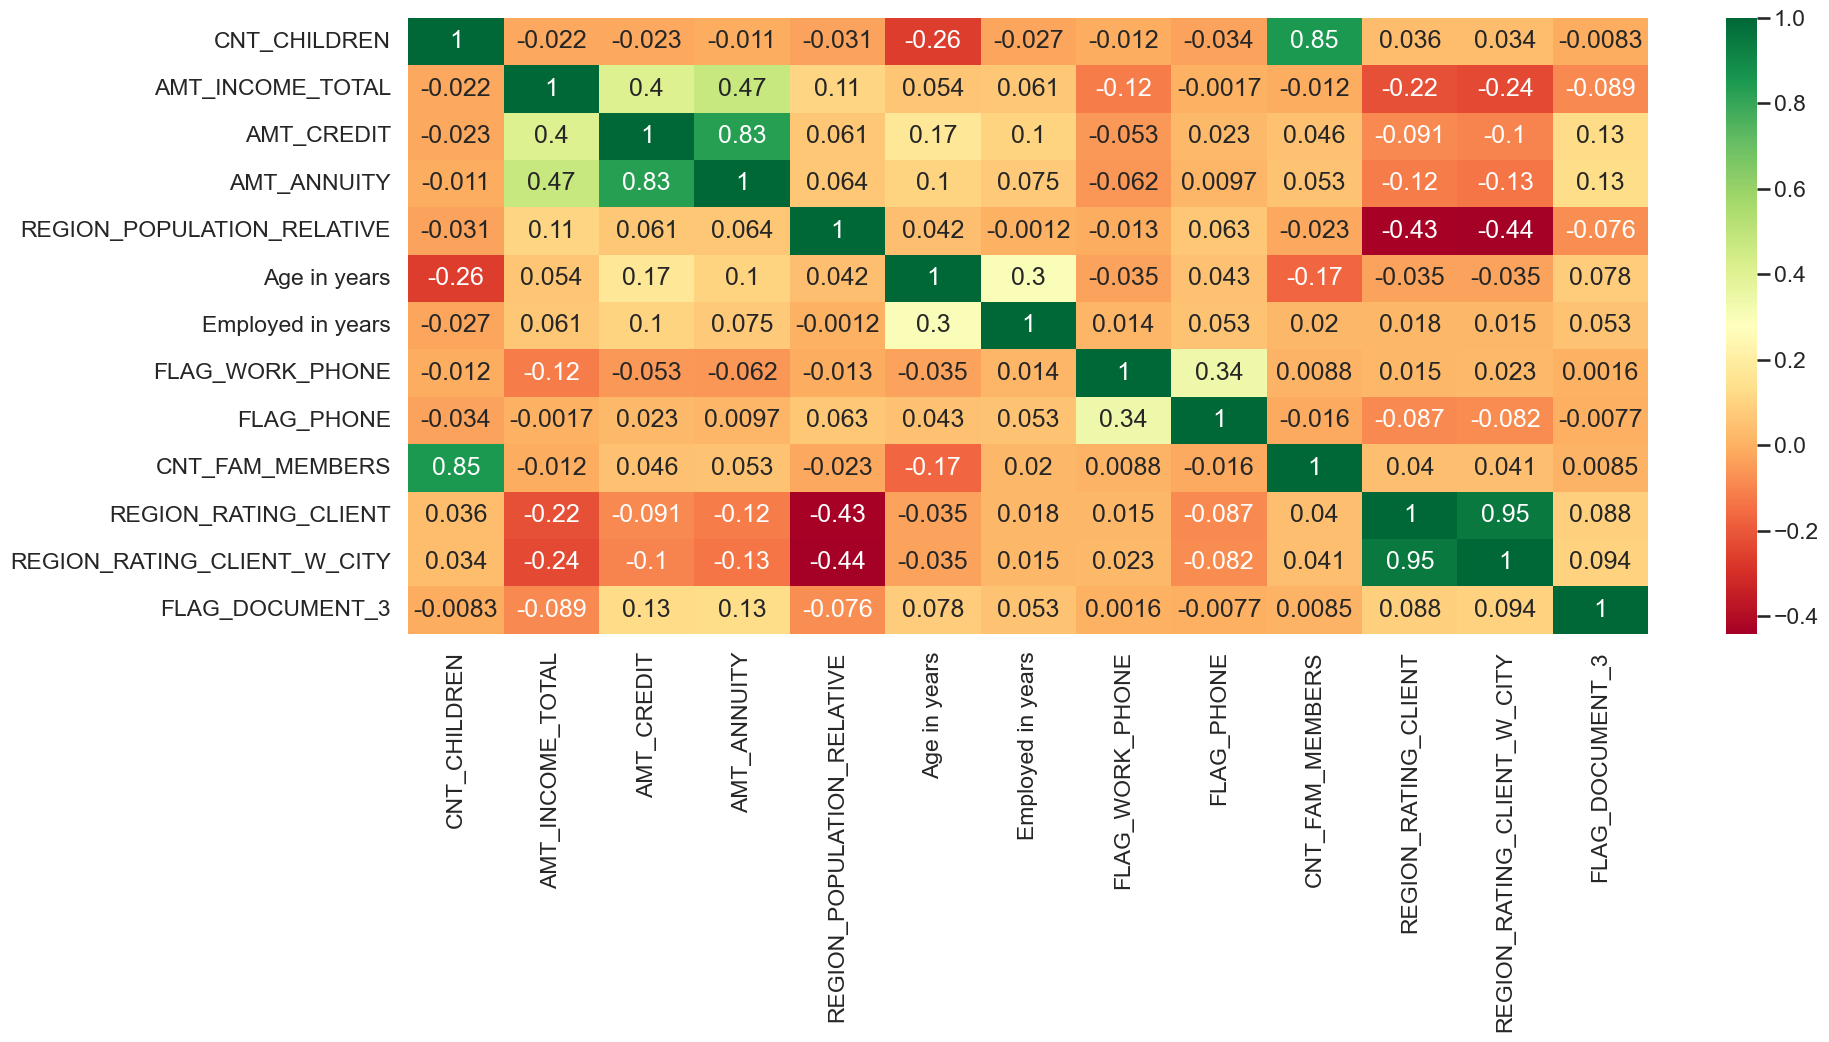

In [620]:
plt.figure(figsize=(20,8))
sns.heatmap(data=target_repayer,cmap="RdYlGn",annot=True)
plt.savefig('plot image 13.png')
plt.show()

### Observation 14:
a) 
Credit amount is inversely proportional to thno.of children client has, FLAG_WORK_PHONE, REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY.
   This ch means Credit amount is highfor family with less no.of childage and vice-ver sb) Credit amount has low positive correlation with low age client. 
c) The income is moderate in densely populated area.rd) sa.
Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-vee) rsa.
People have less children in densely populated f) area.
Credit and annuity has low positive correlation higher in densely populatedted .area

In [187]:
ap.shape

(251222, 27)

## Data cleaning and data analysis of csv file previous_application

In [189]:
pa=pd.read_csv('previous_application.csv')
pa

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0          2030495      271877     Consumer loans      1730.43   
1          2802425      108129         Cash loans     25188.62   
2          2523466      122040         Cash loans     15060.74   
3          2819243      176158         Cash loans     47041.33   
4          1784265      202054         Cash loans     31924.40   
...            ...         ...                ...          ...   
380630     2772661      195735     Consumer loans      6340.32   
380631     2117915      183583    Revolving loans      2250.00   
380632     1434154      165348     Consumer loans      3694.45   
380633     2029370      331604         Cash loans     14277.65   
380634     1594674      223641     Consumer loans      5008.90   

        AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0              17145.00    17145.00              0.00         17145.00   
1             607500.00   679671.00               NaN        607500.00   
2             112500.00   136444.50               NaN        112500.00   
3             450000.00   470790.00               NaN        450000.00   
4             337500.00   404055.00               NaN        337500.00   
...                 ...         ...               ...              ...   
380630         55822.50    55822.50              0.00         55822.50   
380631         45000.00    45000.00               NaN         45000.00   
380632         29597.99    32527.49              0.00         29597.99   
380633        229500.00   299322.00               NaN        229500.00   
380634         26185.50    27567.00              0.00         26185.50   

       WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                        SATURDAY                    15.00   
1                        THURSDAY                    11.00   
2                         TUESDAY                    11.00   
3                          MONDAY                     7.00   
4                        THURSDAY                     9.00   
...                           ...                      ...   
380630                    TUESDAY                    12.00   
380631                   SATURDAY                    12.00   
380632                   SATURDAY                    16.00   
380633                    TUESDAY                    10.00   
380634                        SAT                      NaN   

       FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                                Y                    1.00               0.00   
1                                Y                    1.00                NaN   
2                                Y                    1.00                NaN   
3                                Y                    1.00                NaN   
4                                Y                    1.00                NaN   
...                            ...                     ...                ...   
380630                           Y                    1.00               0.00   
380631                           Y                    1.00                NaN   
380632                           Y                    1.00               0.00   
380633                           Y                    1.00                NaN   
380634                         NaN                     NaN                NaN   

        RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
0                        0.18                      0.87   
1                         NaN                       NaN   
2                         NaN                       NaN   
3                         NaN                       NaN   
4                         NaN                       NaN   
...                       ...                       ...   
380630                    NaN                       NaN   
380631                    NaN                       NaN   
380632                    NaN                       NaN   
380633            

In [191]:
# listing the columns having more than 40% null value

empty_col1=pa.isnull().sum()
empty_col1

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                     83556
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT               200074
AMT_GOODS_PRICE                 86227
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             1
FLAG_LAST_APPL_PER_CONTRACT         1
NFLAG_LAST_APPL_IN_DAY              1
RATE_DOWN_PAYMENT              200075
RATE_INTEREST_PRIMARY          379268
RATE_INTEREST_PRIVILEGED       379268
NAME_CASH_LOAN_PURPOSE              1
NAME_CONTRACT_STATUS                1
DAYS_DECISION                       1
NAME_PAYMENT_TYPE                   1
CODE_REJECT_REASON                  1
NAME_TYPE_SUITE                186456
NAME_CLIENT_TYPE                    1
NAME_GOODS_CATEGORY                 1
NAME_PORTFOLIO                      1
NAME_PRODUCT_TYPE                   1
CHANNEL_TYPE                        1
SELLERPLACE_

In [193]:
edited_empty_col1=empty_col1[empty_col1.values>(0.4*len(empty_col1))]
edited_empty_col1

AMT_ANNUITY                   83556
AMT_DOWN_PAYMENT             200074
AMT_GOODS_PRICE               86227
RATE_DOWN_PAYMENT            200075
RATE_INTEREST_PRIMARY        379268
RATE_INTEREST_PRIVILEGED     379268
NAME_TYPE_SUITE              186456
CNT_PAYMENT                   83556
PRODUCT_COMBINATION              73
DAYS_FIRST_DRAWING           150996
DAYS_FIRST_DUE               150996
DAYS_LAST_DUE_1ST_VERSION    150996
DAYS_LAST_DUE                150996
DAYS_TERMINATION             150996
NFLAG_INSURED_ON_APPROVAL    150996
dtype: int64

In [195]:
len(edited_empty_col1)

15

In [197]:
pa.shape

(380635, 37)

## Observation 15: So, we have 15 columns which has more than 40% null values, so these columns should be dropped as they will make not much sense in the analysis.

In [199]:
# Removing those 15 columns
edited_empty_col_index1 = list(edited_empty_col1.index)    ## converting index of edited_empty_col1 into list
pa.drop(labels=edited_empty_col_index1,axis=1,inplace=True)   ## droping the columns

In [201]:
pa.shape

(380635, 22)

In [203]:
## Checking how many null values
empty_col1=pa.isnull().sum()
empty_col1

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        1
FLAG_LAST_APPL_PER_CONTRACT    1
NFLAG_LAST_APPL_IN_DAY         1
NAME_CASH_LOAN_PURPOSE         1
NAME_CONTRACT_STATUS           1
DAYS_DECISION                  1
NAME_PAYMENT_TYPE              1
CODE_REJECT_REASON             1
NAME_CLIENT_TYPE               1
NAME_GOODS_CATEGORY            1
NAME_PORTFOLIO                 1
NAME_PRODUCT_TYPE              1
CHANNEL_TYPE                   1
SELLERPLACE_AREA               1
NAME_SELLER_INDUSTRY           1
NAME_YIELD_GROUP               1
dtype: int64

### Observation 16: Since the no.of null values in dataframe are low, so they will not effect the analysis. So leave them as it.

In [205]:
pa

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  \
0          2030495      271877     Consumer loans         17145.00   
1          2802425      108129         Cash loans        607500.00   
2          2523466      122040         Cash loans        112500.00   
3          2819243      176158         Cash loans        450000.00   
4          1784265      202054         Cash loans        337500.00   
...            ...         ...                ...              ...   
380630     2772661      195735     Consumer loans         55822.50   
380631     2117915      183583    Revolving loans         45000.00   
380632     1434154      165348     Consumer loans         29597.99   
380633     2029370      331604         Cash loans        229500.00   
380634     1594674      223641     Consumer loans         26185.50   

        AMT_CREDIT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0         17145.00                   SATURDAY                    15.00   
1        679671.00                   THURSDAY                    11.00   
2        136444.50                    TUESDAY                    11.00   
3        470790.00                     MONDAY                     7.00   
4        404055.00                   THURSDAY                     9.00   
...            ...                        ...                      ...   
380630    55822.50                    TUESDAY                    12.00   
380631    45000.00                   SATURDAY                    12.00   
380632    32527.49                   SATURDAY                    16.00   
380633   299322.00                    TUESDAY                    10.00   
380634    27567.00                        SAT                      NaN   

       FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                Y                    1.00   
1                                Y                    1.00   
2                                Y                    1.00   
3                                Y                    1.00   
4                                Y                    1.00   
...                            ...                     ...   
380630                           Y                    1.00   
380631                           Y                    1.00   
380632                           Y                    1.00   
380633                           Y                    1.00   
380634                         NaN                     NaN   

       NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                         XAP             Approved         -73.00   
1                         XNA             Approved        -164.00   
2                         XNA             Approved        -301.00   
3                         XNA             Approved        -512.00   
4                     Repairs              Refused        -781.00   
...                       ...                  ...            ...   
380630                    XAP             Approved        -139.00   
380631                    XAP             Approved        -467.00   
380632                    XAP             Approved        -370.00   
380633                    XNA             Approved        -809.00   
380634                    NaN                  NaN            NaN   

            NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0       Cash through the bank                XAP         Repeater   
1                         XNA                XAP         Repeater   
2       Cash through the bank                XAP         Repeater   
3       Cash through the bank                XAP         Repeater   
4       Cash through the bank                 HC         Repeater   
...                       ...                ...              ...   
380630  Cash through the bank                XAP         Repeater   
380631                    XNA                XAP              New   
380632  Cash through the bank                XAP              New   
380633  Cash t

In [ ]:
## Some columns contains 'XNA' and 'XAP',which should be treated properly and where necessary should be dropped and some also has improper formats of column items that has to be changed.

In [207]:
pa['NAME_CASH_LOAN_PURPOSE'].value_counts()    ## This column is very useful so all XNA and XAP should be replaced by unknown.

NAME_CASH_LOAN_PURPOSE
XAP                                 213963
XNA                                 151101
Repairs                               5296
Other                                 3496
Urgent needs                          1887
Buying a used car                      652
Building a house or an annex           611
Everyday expenses                      547
Medicine                               478
Payments on other loans                430
Education                              345
Journey                                262
Buying a new car                       232
Wedding / gift / holiday               229
Purchase of electronic equipment       221
Buying a home                          187
Car repairs                            184
Furniture                              174
Buying a holiday home / land           136
Business development                    84
Gasification / water supply             68
Buying a garage                         28
Hobby                          

In [209]:
# Removing the column values of 'XNA' and 'XAP'

pa.drop(pa[pa['NAME_CASH_LOAN_PURPOSE']=='XNA'].index,inplace=True)
pa.drop(pa[pa['NAME_CASH_LOAN_PURPOSE']=='XAP'].index,inplace=True)
pa.shape

(15571, 22)

In [287]:
pa['NAME_PAYMENT_TYPE'].value_counts()   ##  This column should be left as it as not effect analysis.

NAME_PAYMENT_TYPE
Cash through the bank                        14335
XNA                                           1146
Non-cash from your account                      70
Cashless from the account of the employer       19
Name: count, dtype: int64

In [291]:
pa['CODE_REJECT_REASON'].value_counts()   ##  This column should be left as it as not effect analysis.

CODE_REJECT_REASON
XAP       6257
HC        5003
LIMIT     2115
SCO       1144
VERIF      543
SCOFR      320
XNA        134
CLIENT      53
SYSTEM       1
Name: count, dtype: int64

In [219]:
# Treating column DAYS_DECISION and SELLERPLACE_AREA
pa.DAYS_DECISION=abs(pa.DAYS_DECISION)
pa.SELLERPLACE_AREA=abs(pa.SELLERPLACE_AREA)
pa

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  \
4          1784265      202054         Cash loans        337500.00   
5          1383531      199383         Cash loans        315000.00   
19         1173070      199178         Cash loans         45000.00   
51         2664403      163660         Cash loans         67500.00   
85         1981960      306707         Cash loans        225000.00   
...            ...         ...                ...              ...   
380536     2563206      237562         Cash loans       1125000.00   
380545     1498681      368632         Cash loans        337500.00   
380595     1049385      196923         Cash loans       1575000.00   
380603     2713536      121444         Cash loans         45000.00   
380634     1594674      223641     Consumer loans         26185.50   

        AMT_CREDIT WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
4        404055.00                   THURSDAY                     9.00   
5        340573.50                   SATURDAY                     8.00   
19        49455.00                   SATURDAY                    16.00   
51        82611.00                   SATURDAY                    10.00   
85       269550.00                  WEDNESDAY                    11.00   
...            ...                        ...                      ...   
380536  1288350.00                    TUESDAY                    12.00   
380545   353092.50                  WEDNESDAY                    11.00   
380595  1724688.00                   SATURDAY                    16.00   
380603    46485.00                    TUESDAY                    12.00   
380634    27567.00                        SAT                      NaN   

       FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
4                                Y                    1.00   
5                                Y                    1.00   
19                               Y                    1.00   
51                               Y                    1.00   
85                               Y                    1.00   
...                            ...                     ...   
380536                           Y                    1.00   
380545                           Y                    1.00   
380595                           Y                    1.00   
380603                           Y                    1.00   
380634                         NaN                     NaN   

              NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
4                            Repairs              Refused         781.00   
5                  Everyday expenses             Approved         684.00   
19                 Everyday expenses              Refused         584.00   
51                       Car repairs             Approved         766.00   
85      Building a house or an annex              Refused          13.00   
...                              ...                  ...            ...   
380536             Buying a used car             Approved         694.00   
380545                         Other             Approved         651.00   
380595                  Urgent needs              Refused         133.00   
380603                  Urgent needs             Approved         503.00   
380634                           NaN                  NaN            NaN   

            NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
4       Cash through the bank                 HC         Repeater   
5       Cash through the bank                XAP         Repeater   
19                        XNA                 HC         Repeater   
51      Cash through the bank                XAP              New   
85      Cash through the bank              SCOFR         Repeater   
...                       ...                ...              ...   
380536  Cash through the bank                XAP              New   
380545  Cash through the bank                XAP         Repeater   

### Observation 17: 
a) Column name NAME_CASH_LOAN_PURPOSE contains large no.of dummy values, so all XNA and XAP should be dropped.
b) Column name NAME_PAYMENT_TYPE & NAME_PRODUCT_TYPE and CODE_REJECT_REASON should be left as it is as they will be not used in data anaysis.
c) Column name NAME_SELLER_INDUSTRY should be left as it unimportant here.
d) Treating column DAYS_DECISION and SELLERPLACE_AREA, so that negative should be removed.

In [221]:
ap.shape

(251222, 27)

In [223]:
pa.shape

(15571, 22)

In [225]:
ap.head(1)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0         202500.00   406597.50     24700.50   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Age in years  \
0  House / apartment                        0.02         26.00   

   Employed in years  FLAG_WORK_PHONE  FLAG_PHONE  CNT_FAM_MEMBERS  \
0               2.00                0           1             1.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   

  WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  FLAG_DOCUMENT_3  \
0                  WEDNESDAY  Business Entity Type 3                1   

  AMT_INCOME_RANGE AMT_CREDIT_RANGE  
0    200000-225000    400000-450000

In [227]:
pa.head(1)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
4     1784265      202054         Cash loans        337500.00   404055.00   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
4                   THURSDAY                     9.00   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
4                           Y                    1.00                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
4              Refused         781.00  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
4           walk-in  Credit and cash offices              1.00   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  
4                  XNA             high

## Merging of application_data and previous_data

In [235]:
# Now merging the Application dataset with previous application dataset

final_appa=pd.merge(left=ap,right=pa,how='inner',on='SK_ID_CURR')
final_appa.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100063       0           Cash loans           F            N   
1      100063       0           Cash loans           F            N   
2      100077       0           Cash loans           M            N   
3      100243       0           Cash loans           M            N   
4      100302       0           Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0         180000.00     837427.50     45558.00   
1               Y             0         180000.00     837427.50     45558.00   
2               Y             0         180000.00    1256400.00     40657.50   
3               Y             0         112500.00     161730.00     13833.00   
4               Y             0         180000.00     187704.00      9256.50   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0               Working               Higher education               Married   
1               Working               Higher education               Married   
2  Commercial associate  Secondary / secondary special  Single / not married   
3               Working               Higher education               Married   
4               Working  Secondary / secondary special        Civil marriage   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  Age in years  \
0  House / apartment                        0.02         35.00   
1  House / apartment                        0.02         35.00   
2  House / apartment                        0.07         33.00   
3  House / apartment                        0.03         27.00   
4  House / apartment                        0.02         25.00   

   Employed in years  FLAG_WORK_PHONE  FLAG_PHONE  CNT_FAM_MEMBERS  \
0              11.00                0           1             2.00   
1              11.00                0           1             2.00   
2               2.00                0           0             1.00   
3               2.00                1           1             2.00   
4               1.00                0           0             2.00   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     2                            2   
2                     1                            1   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x       ORGANIZATION_TYPE  FLAG_DOCUMENT_3  \
0                       MONDAY                Medicine                1   
1                       MONDAY                Medicine                1   
2                    WEDNESDAY                  Police                1   
3                       SUNDAY  Business Entity Type 3                1   
4                    WEDNESDAY                    Bank                1   

  AMT_INCOME_RANGE  AMT_CREDIT_RANGE  SK_ID_PREV NAME_CONTRACT_TYPE_y  \
0    175000-200000     800000-850000     2481012           Cash loans   
1    175000-200000     800000-850000     1528229           Cash loans   
2    175000-200000  900000 and above     1879539           Cash loans   
3    100000-125000     150000-200000     1223122           Cash loans   
4    175000-200000     150000-200000     1438335           Cash loans   

   AMT_APPLICATION  AMT_CREDIT_y WEEKDAY_APPR_PROCESS_START_y  \
0        202500.00     247837.50                       MONDAY   
1        157500.00     192762.00                       MONDAY   
2       1147500.00    1344406.50                      TUESDAY   
3        337500.00     422982.00                      TUESDAY   
4         67500.00      76410.00                       FRIDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                    12.00                           Y   
1                    13.00                           Y   
2   

In [231]:
final_appa.shape

(11525, 48)

In [237]:
# Removing unwanted columns for analysis

final_appa.drop(['WEEKDAY_APPR_PROCESS_START_x','FLAG_DOCUMENT_3','AMT_INCOME_RANGE','AMT_CREDIT_RANGE','SK_ID_PREV','NAME_CONTRACT_TYPE_y','WEEKDAY_APPR_PROCESS_START_y','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','NAME_PAYMENT_TYPE','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','SELLERPLACE_AREA'],axis=1,inplace=True)
final_appa

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0          100063       0           Cash loans           F            N   
1          100063       0           Cash loans           F            N   
2          100077       0           Cash loans           M            N   
3          100243       0           Cash loans           M            N   
4          100302       0           Cash loans           F            N   
...           ...     ...                  ...         ...          ...   
11520      456043       0           Cash loans           M            Y   
11521      456127       0           Cash loans           M            N   
11522      456217       0           Cash loans           F            N   
11523      456218       0           Cash loans           F            N   
11524      456245       0           Cash loans           F            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                   Y             0         180000.00     837427.50   
1                   Y             0         180000.00     837427.50   
2                   Y             0         180000.00    1256400.00   
3                   Y             0         112500.00     161730.00   
4                   Y             0         180000.00     187704.00   
...               ...           ...               ...           ...   
11520               N             2         202500.00     675000.00   
11521               N             0         157500.00     183384.00   
11522               Y             0         360000.00     796396.50   
11523               Y             0         225000.00    1125000.00   
11524               Y             3          81000.00     269550.00   

       AMT_ANNUITY      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         45558.00               Working               Higher education   
1         45558.00               Working               Higher education   
2         40657.50  Commercial associate  Secondary / secondary special   
3         13833.00               Working               Higher education   
4          9256.50               Working  Secondary / secondary special   
...            ...                   ...                            ...   
11520     34596.00  Commercial associate  Secondary / secondary special   
11521     19588.50               Working  Secondary / secondary special   
11522     38443.50         State servant               Higher education   
11523     40540.50  Commercial associate               Higher education   
11524     11871.00  Commercial associate  Secondary / secondary special   

         NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   Married    House / apartment                        0.02   
1                   Married    House / apartment                        0.02   
2      Single / not married    House / apartment                        0.07   
3                   Married    House / apartment                        0.03   
4            Civil marriage    House / apartment                        0.02   
...                     ...                  ...                         ...   
11520               Married    House / apartment                        0.04   
11521               Married  Municipal apartment                        0.02   
11522        Civil marriage    House / apartment                        0.01   
11523               Married    House / apartment                        0.03   
11524               Married    House / apartment                        0.01   

       Age in years  Employed in years  FLAG_WORK_PHONE  FLAG_PHONE  \
0             35.00              11.00                0           1   
1             35.00              11.00                0           1   
2             33.00               2.00                0           0   
3             27.00               2.00                1           1   
4             25.00               1.

In [239]:
final_appa.NAME_CLIENT_TYPE.value_counts() 

NAME_CLIENT_TYPE
Repeater     9329
New          1595
Refreshed     589
XNA            11
Name: count, dtype: int64

In [241]:
# dropping XNA values from column NAME_CLIENT_TYPE
final_appa.drop(final_appa.loc[final_appa['NAME_CLIENT_TYPE']=='XNA'].index,inplace=True)
final_appa.NAME_CLIENT_TYPE.value_counts()

NAME_CLIENT_TYPE
Repeater     9329
New          1595
Refreshed     589
Name: count, dtype: int64

In [243]:
final_appa.shape

(11514, 32)

### Observation 18
a) Application data and previous data are merged in inner way as we interested in only those rows which are common to both.
b) Some unnecessary columns are to be dropped as they are not used in analysis.
c) Some important columns contain dummy values,they should be dropped, so that it does not effect analysis.

## Performing Univariate analysis

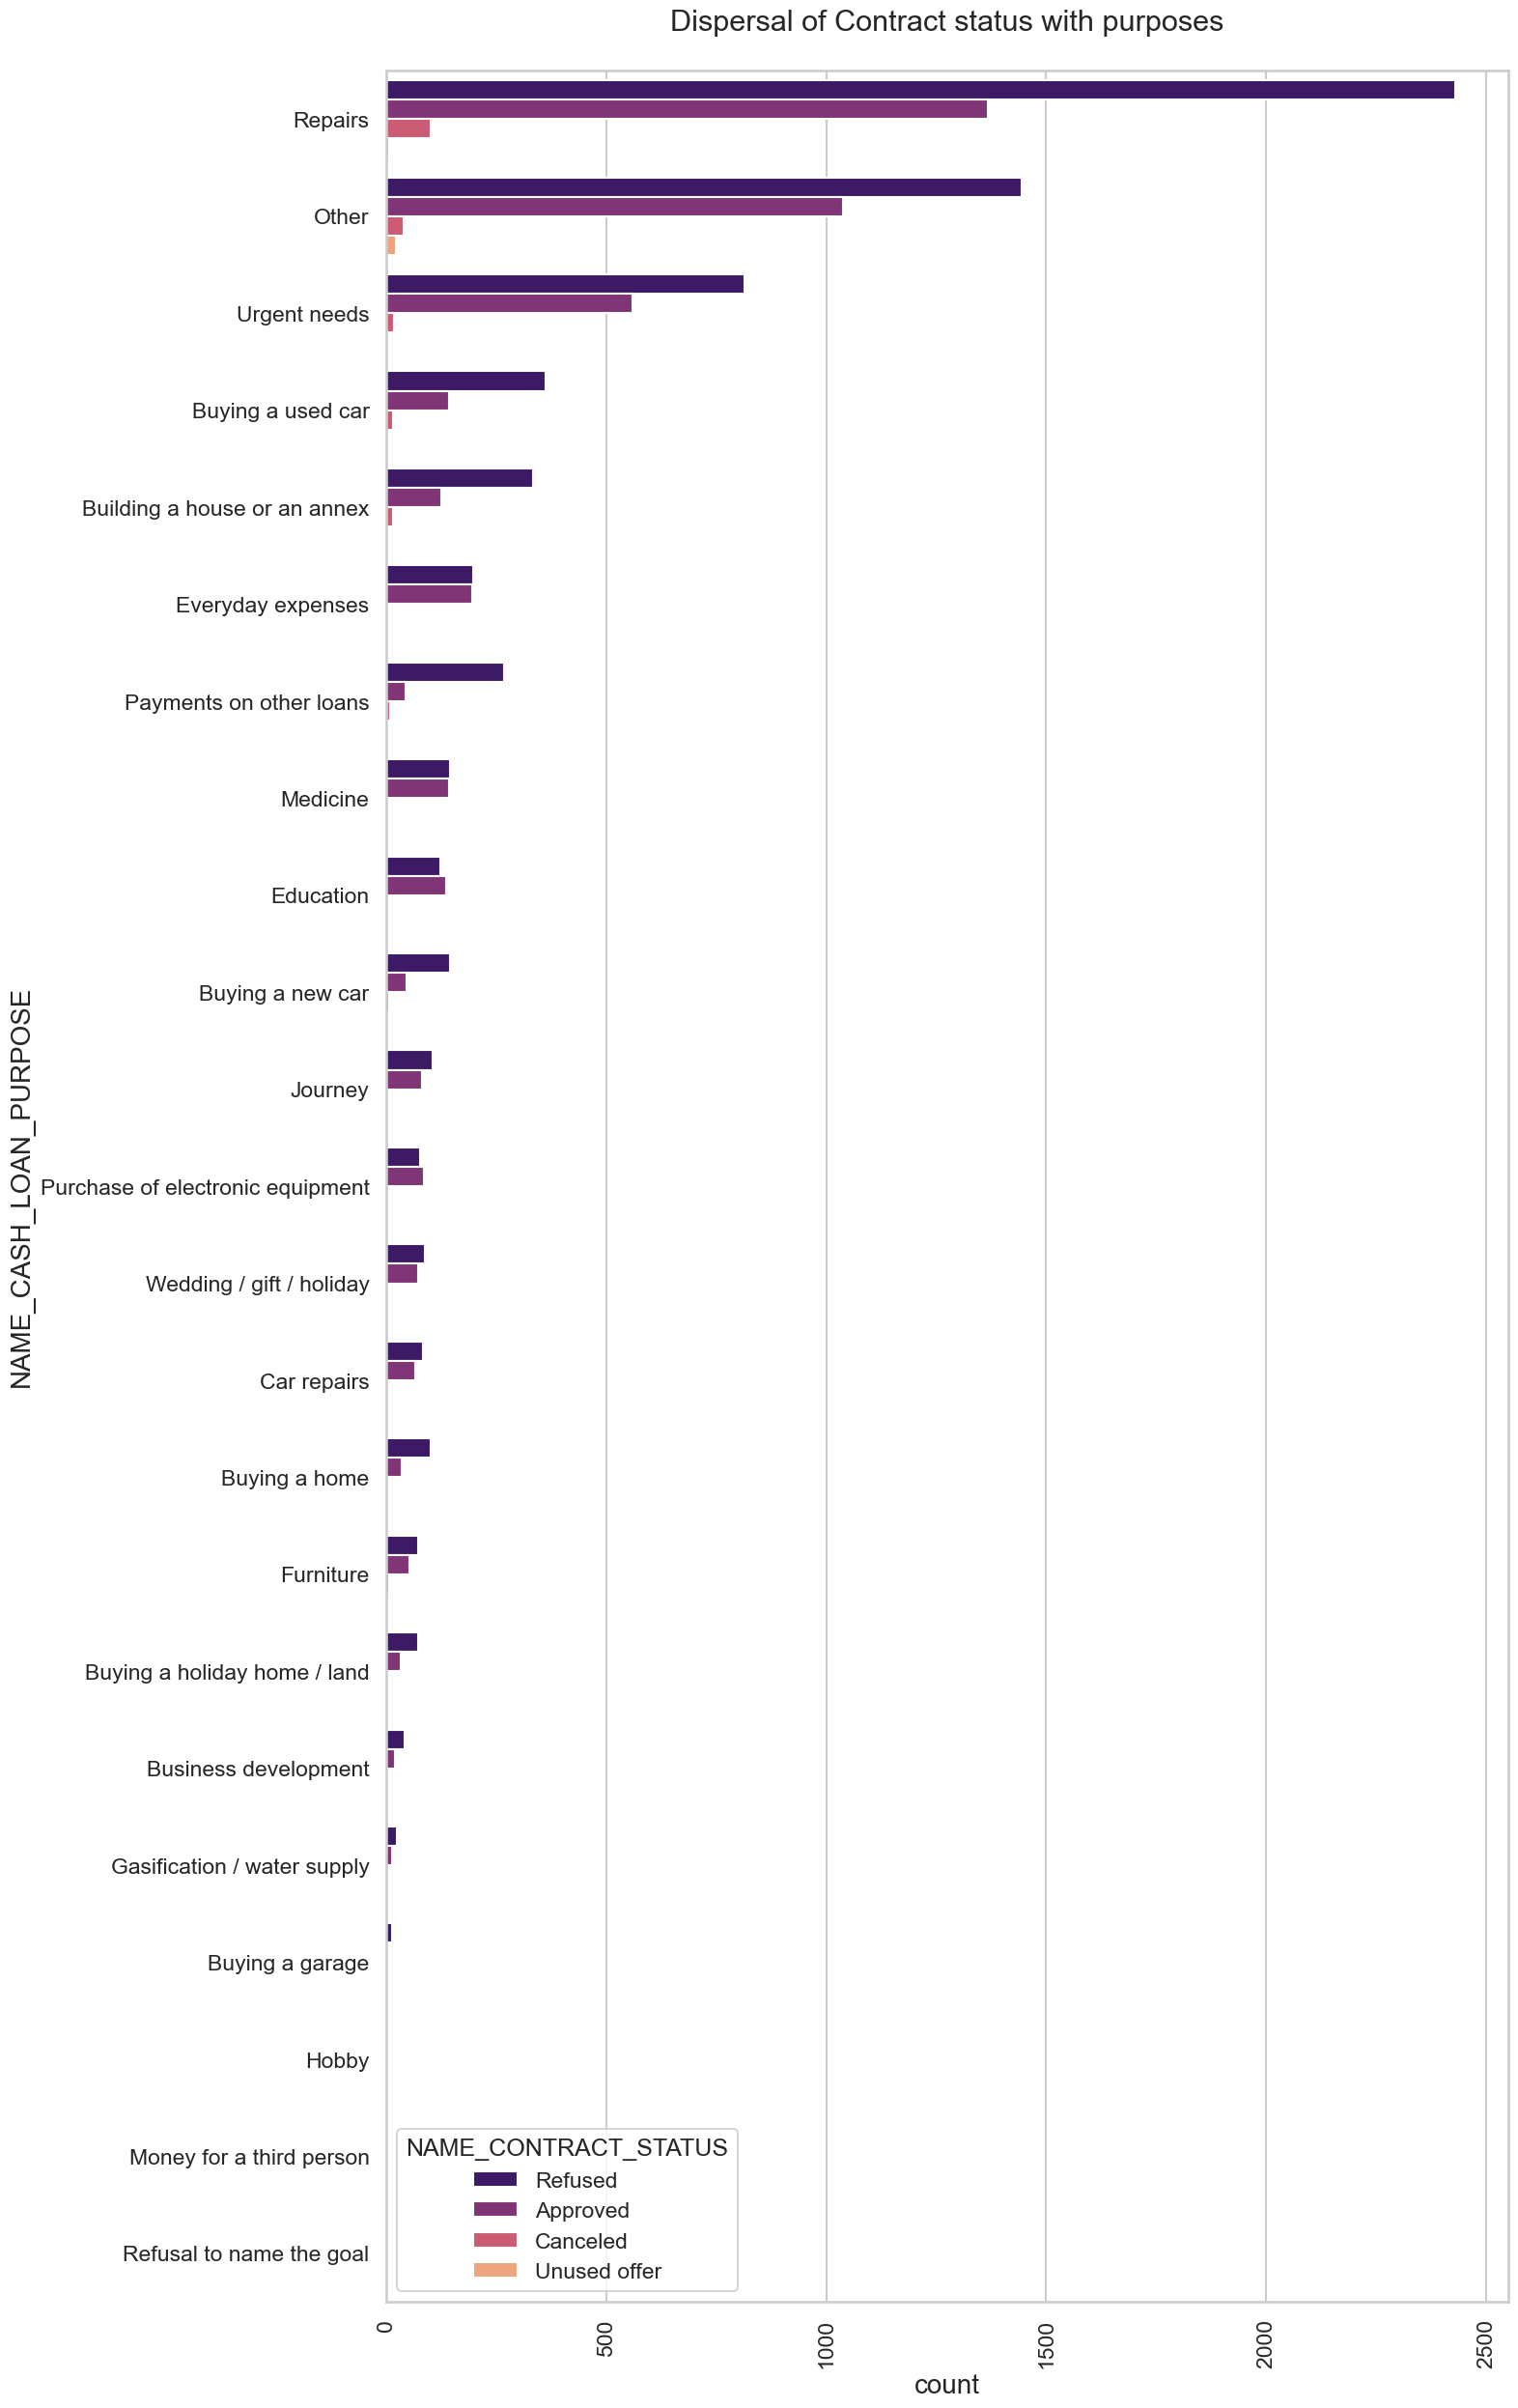

In [668]:
# Dispersal of contract status 

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.title('Dispersal of Contract status with purposes')
plt.savefig('plot image 18.png')
ax = sns.countplot(data = final_appa, y= 'NAME_CASH_LOAN_PURPOSE',order=final_appa['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

### Observation 19a) 
Mosof t rejectn areme from purpose 'repairs'b) .
FEveryday expenses and medicine on purposes we have equal number of approves and rejectic) onyment on ing other l, building a houseoans and buying a new arer is having significant hi cancels.oves

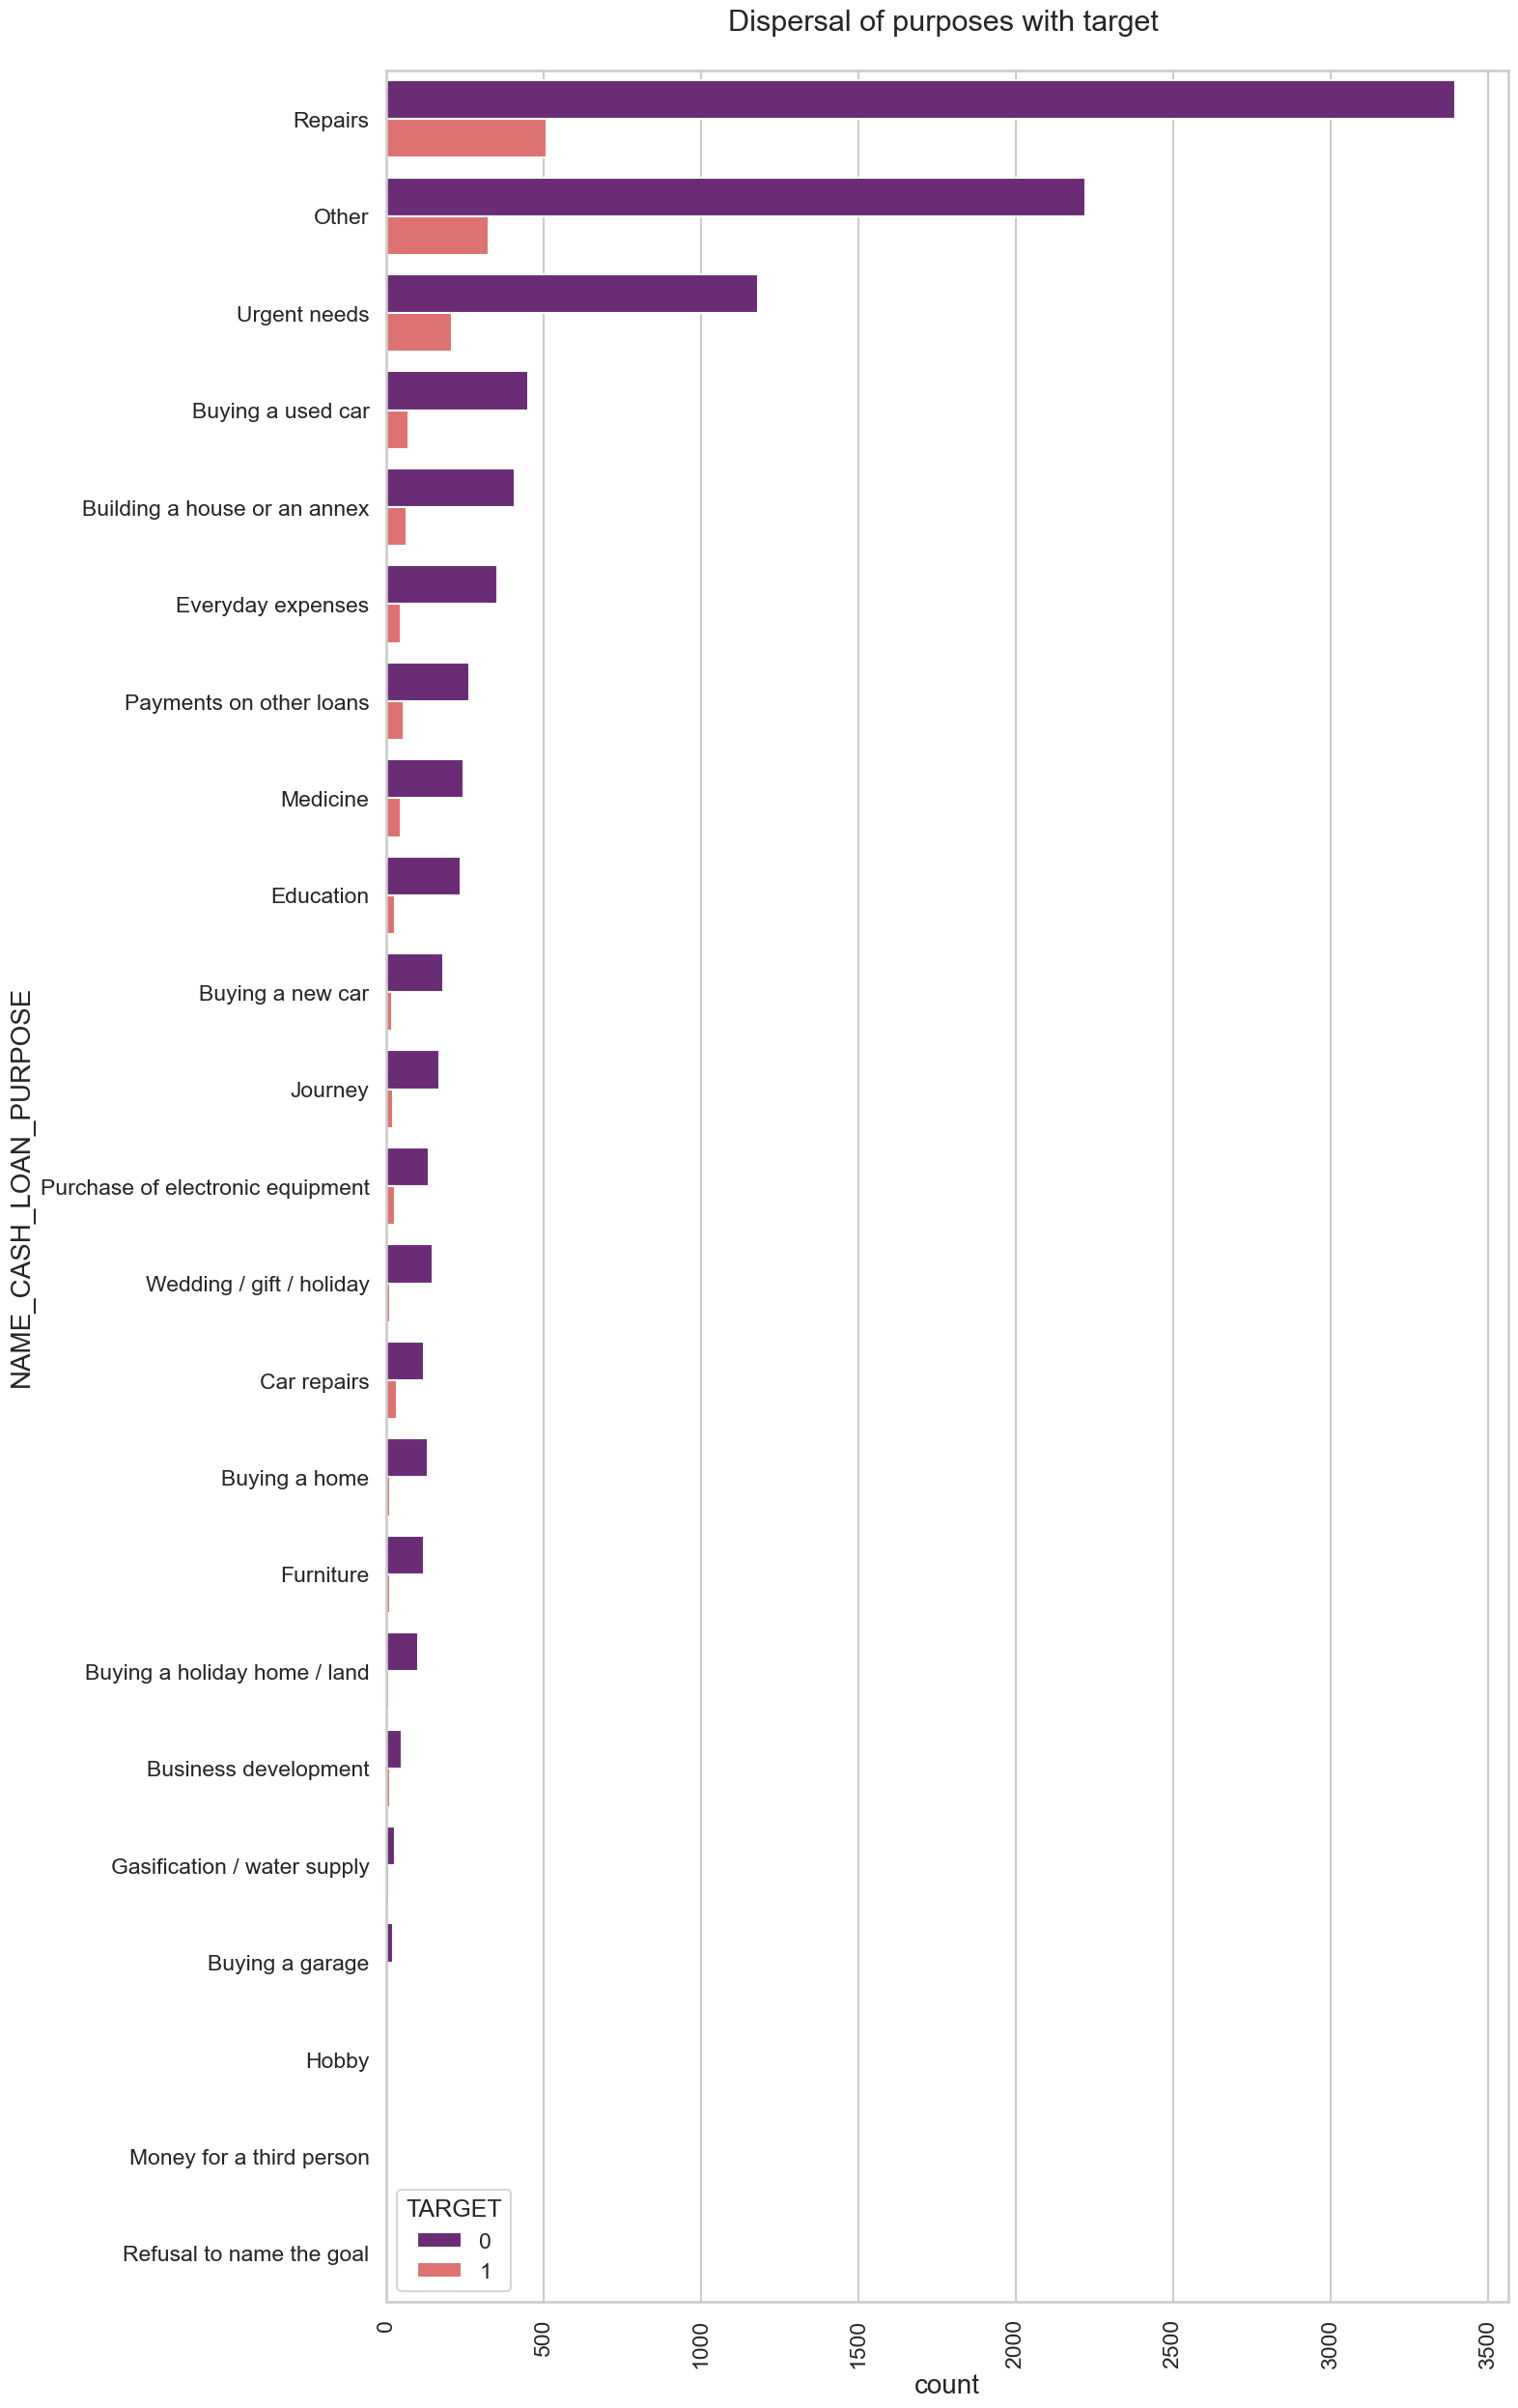

In [622]:
# Dispersal of contract status

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.title('Dispersal of purposes with target ')
ax = sns.countplot(data = final_appa, y='NAME_CASH_LOAN_PURPOSE', order=final_appa['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 
plt.savefig('plot image 14.png')
plt.show()

### Observation 20
a) Loan purposes with 'Repairs' are having maximum difficulites in payment on time (among all purposes).
b) Loan payment is significantly higher than facing difficulties among all the purposes.

## Bivariate analysis

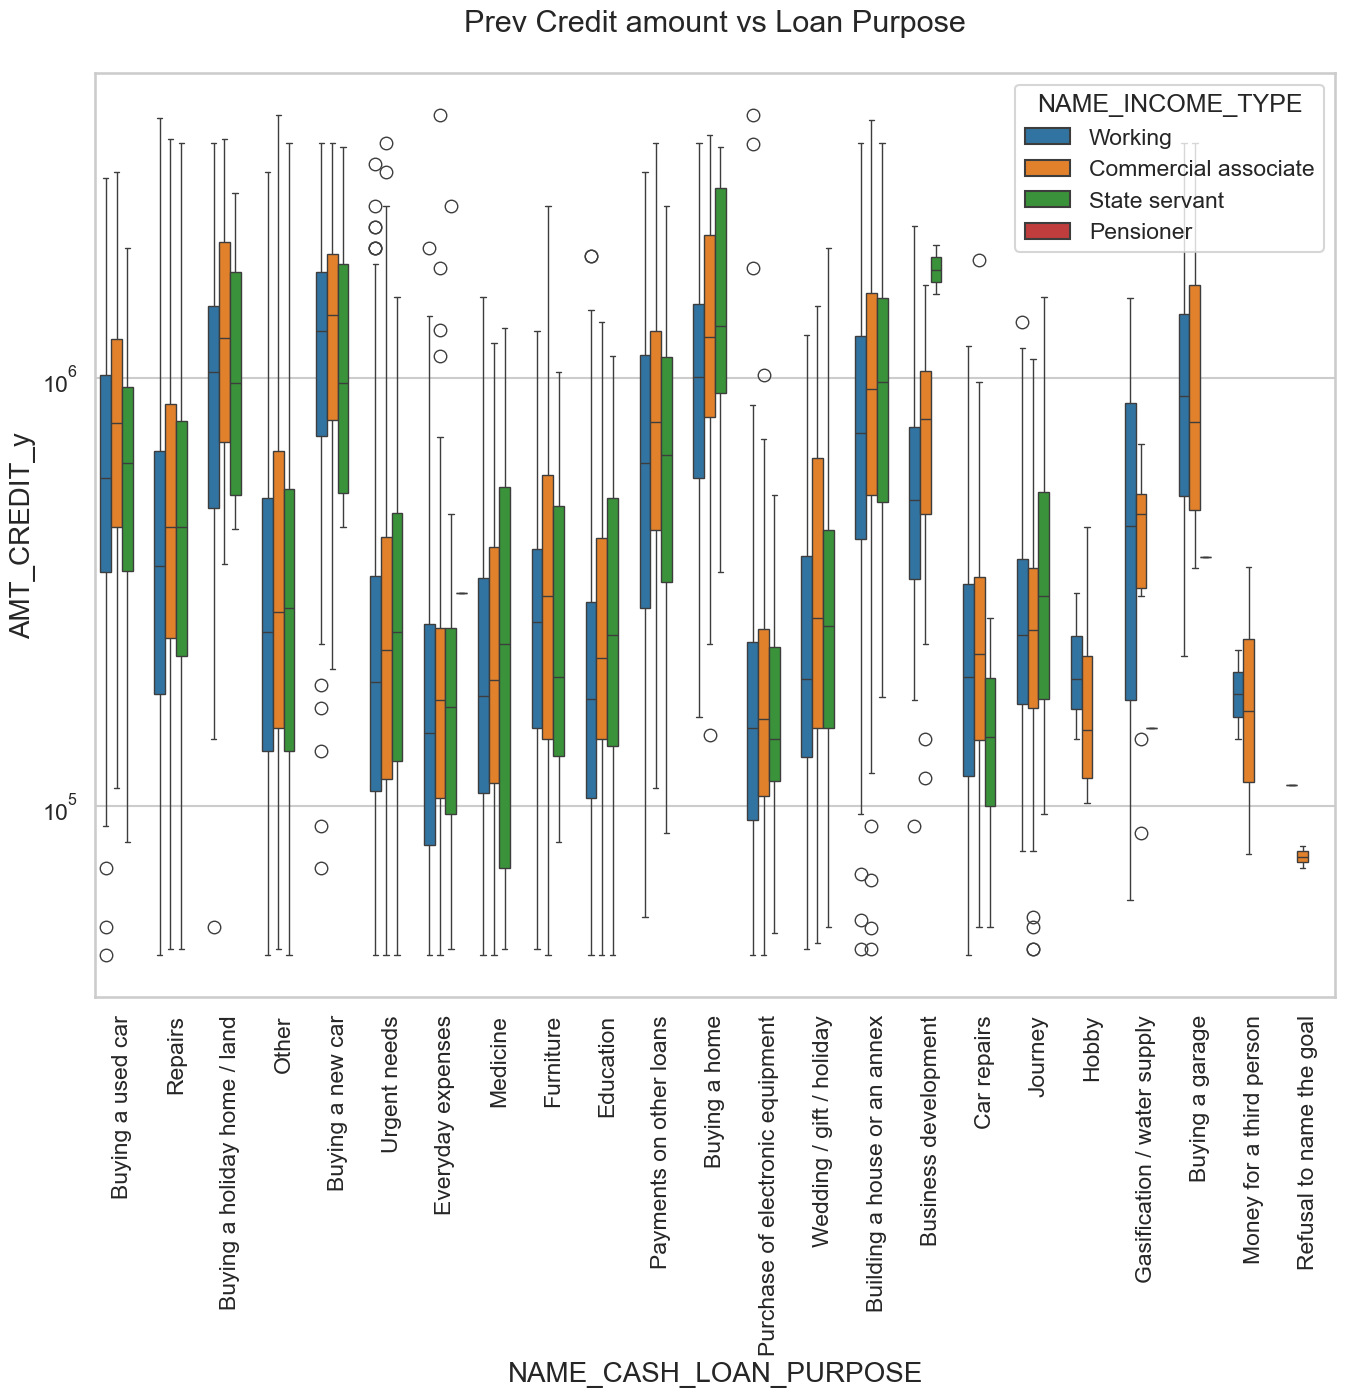

In [624]:
# Box plot for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =final_appa, x='NAME_CASH_LOAN_PURPOSE',y='AMT_CREDIT_y',hue='NAME_INCOME_TYPE',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.savefig('plot image 15.png')
plt.show()

### Observation 21a) 
The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a houseare s higherb) .
State servants have a significant amount of credit appl.ic) car repairs andor a Hohaveying less credits app for.

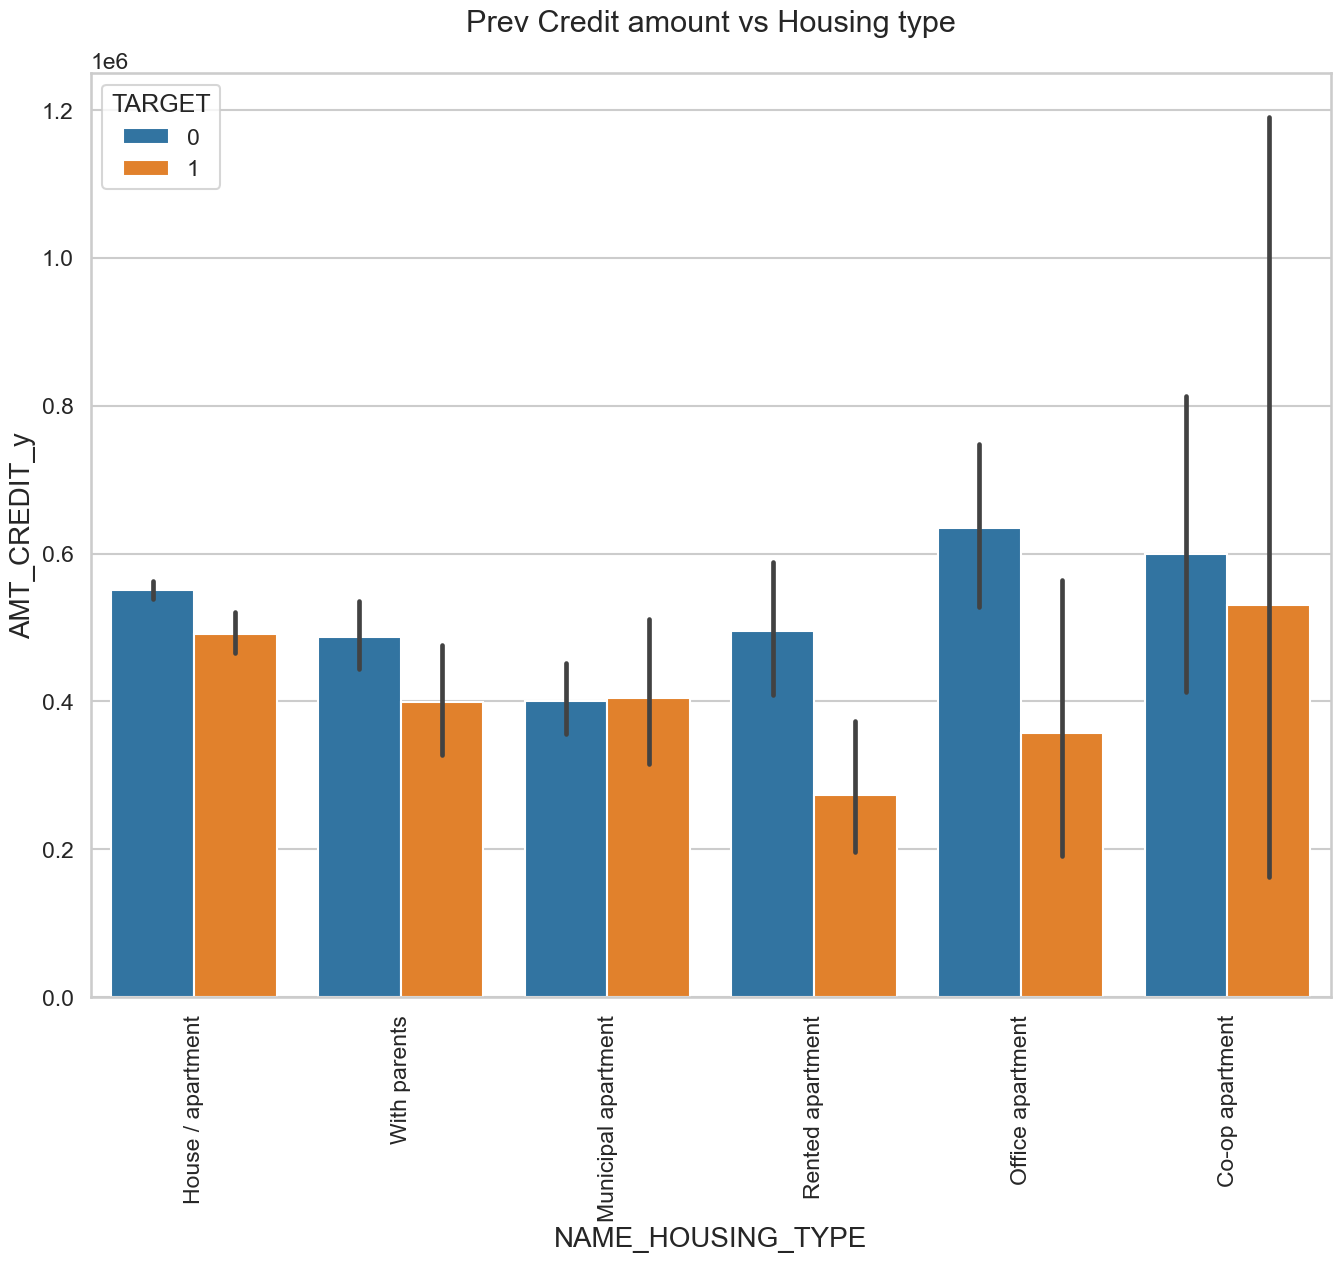

In [626]:
# Box plot for Credit amount prev vs Housing type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =final_appa,x='NAME_HOUSING_TYPE',y='AMT_CREDIT_y',hue='TARGET')
plt.title('Prev Credit amount vs Housing type')
plt.savefig('plot image 16.png')
plt.show()

### Observation 22
We see that all housing have having higher credit for target = 0 and municipal apartment is having almost same credit for target 0 & 1. So, we can say that bank should be very alert on  giving loans to the housing type of cmunicipal apartment as they become defaulters.

## Multivariate Analysis

###  Correlation matrix & Heat Map

In [266]:
final_num_col=final_appa.dtypes[final_appa.dtypes!='object'].index
len(final_num_col)                 

16

In [268]:
final_num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
       'Age in years', 'Employed in years', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'AMT_APPLICATION', 'AMT_CREDIT_y'],
      dtype='object')

In [306]:
final_num_col1=final_appa[final_num_col]
final_num_col_corr=final_num_col1.iloc[0:,2:]
final_correlation_matrix=final_num_col_corr.corr(method='spearman')
final_correlation_matrix

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
CNT_CHILDREN                         1.00             -0.03         -0.01   
AMT_INCOME_TOTAL                    -0.03              1.00          0.38   
AMT_CREDIT_x                        -0.01              0.38          1.00   
AMT_ANNUITY                          0.01              0.44          0.81   
REGION_POPULATION_RELATIVE          -0.02              0.12          0.09   
Age in years                        -0.32              0.08          0.13   
Employed in years                   -0.06              0.05          0.09   
FLAG_WORK_PHONE                      0.01             -0.16         -0.06   
FLAG_PHONE                          -0.03             -0.01          0.00   
CNT_FAM_MEMBERS                      0.84             -0.03          0.04   
REGION_RATING_CLIENT                 0.04             -0.20         -0.08   
REGION_RATING_CLIENT_W_CITY          0.04             -0.22         -0.09   
AMT_APPLICATION                      0.00              0.31          0.24   
AMT_CREDIT_y                         0.01              0.30          0.23   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                        0.01                       -0.02   
AMT_INCOME_TOTAL                    0.44                        0.12   
AMT_CREDIT_x                        0.81                        0.09   
AMT_ANNUITY                         1.00                        0.07   
REGION_POPULATION_RELATIVE          0.07                        1.00   
Age in years                        0.05                        0.05   
Employed in years                   0.05                        0.03   
FLAG_WORK_PHONE                    -0.08                       -0.02   
FLAG_PHONE                         -0.01                        0.05   
CNT_FAM_MEMBERS                     0.06                       -0.01   
REGION_RATING_CLIENT               -0.10                       -0.42   
REGION_RATING_CLIENT_W_CITY        -0.11                       -0.43   
AMT_APPLICATION                     0.21                        0.05   
AMT_CREDIT_y                        0.21                        0.05   

                             Age in years  Employed in years  FLAG_WORK_PHONE  \
CNT_CHILDREN                        -0.32              -0.06             0.01   
AMT_INCOME_TOTAL                     0.08               0.05            -0.16   
AMT_CREDIT_x                         0.13               0.09            -0.06   
AMT_ANNUITY                          0.05               0.05            -0.08   
REGION_POPULATION_RELATIVE           0.05               0.03            -0.02   
Age in years                         1.00               0.26            -0.06   
Employed in years                    0.26               1.00             0.01   
FLAG_WORK_PHONE                     -0.06               0.01             1.00   
FLAG_PHONE                           0.02               0.03             0.36   
CNT_FAM_MEMBERS                     -0.25              -0.02             0.03   
REGION_RATING_CLIENT                -0.07              -0.00             0.02   
REGION_RATING_CLIENT_W_CITY         -0.07              -0.00             0.03   
AMT_APPLICATION                     -0.00              -0.00             0.00   
AMT_CREDIT_y                        -0.01              -0.00            -0.00   

                             FLAG_PHONE  CNT_FAM_MEMBERS  \
CNT_CHILDREN                      -0.03             0.84   
AMT_INCOME_TOTAL                  -0.01            -0.03   
AMT_CREDIT_x                       0.00             0.04   
AMT_ANNUITY                       -0.01             0.06   
REGION_POPULATION_RELATIVE         0.05            -0.01   
Age in years                       0.02            -0.25   
Employed in years                  0.03            -0.02   
FLAG_WORK_PHONE                    0.36             0.03   
FLAG_PHONE                         1

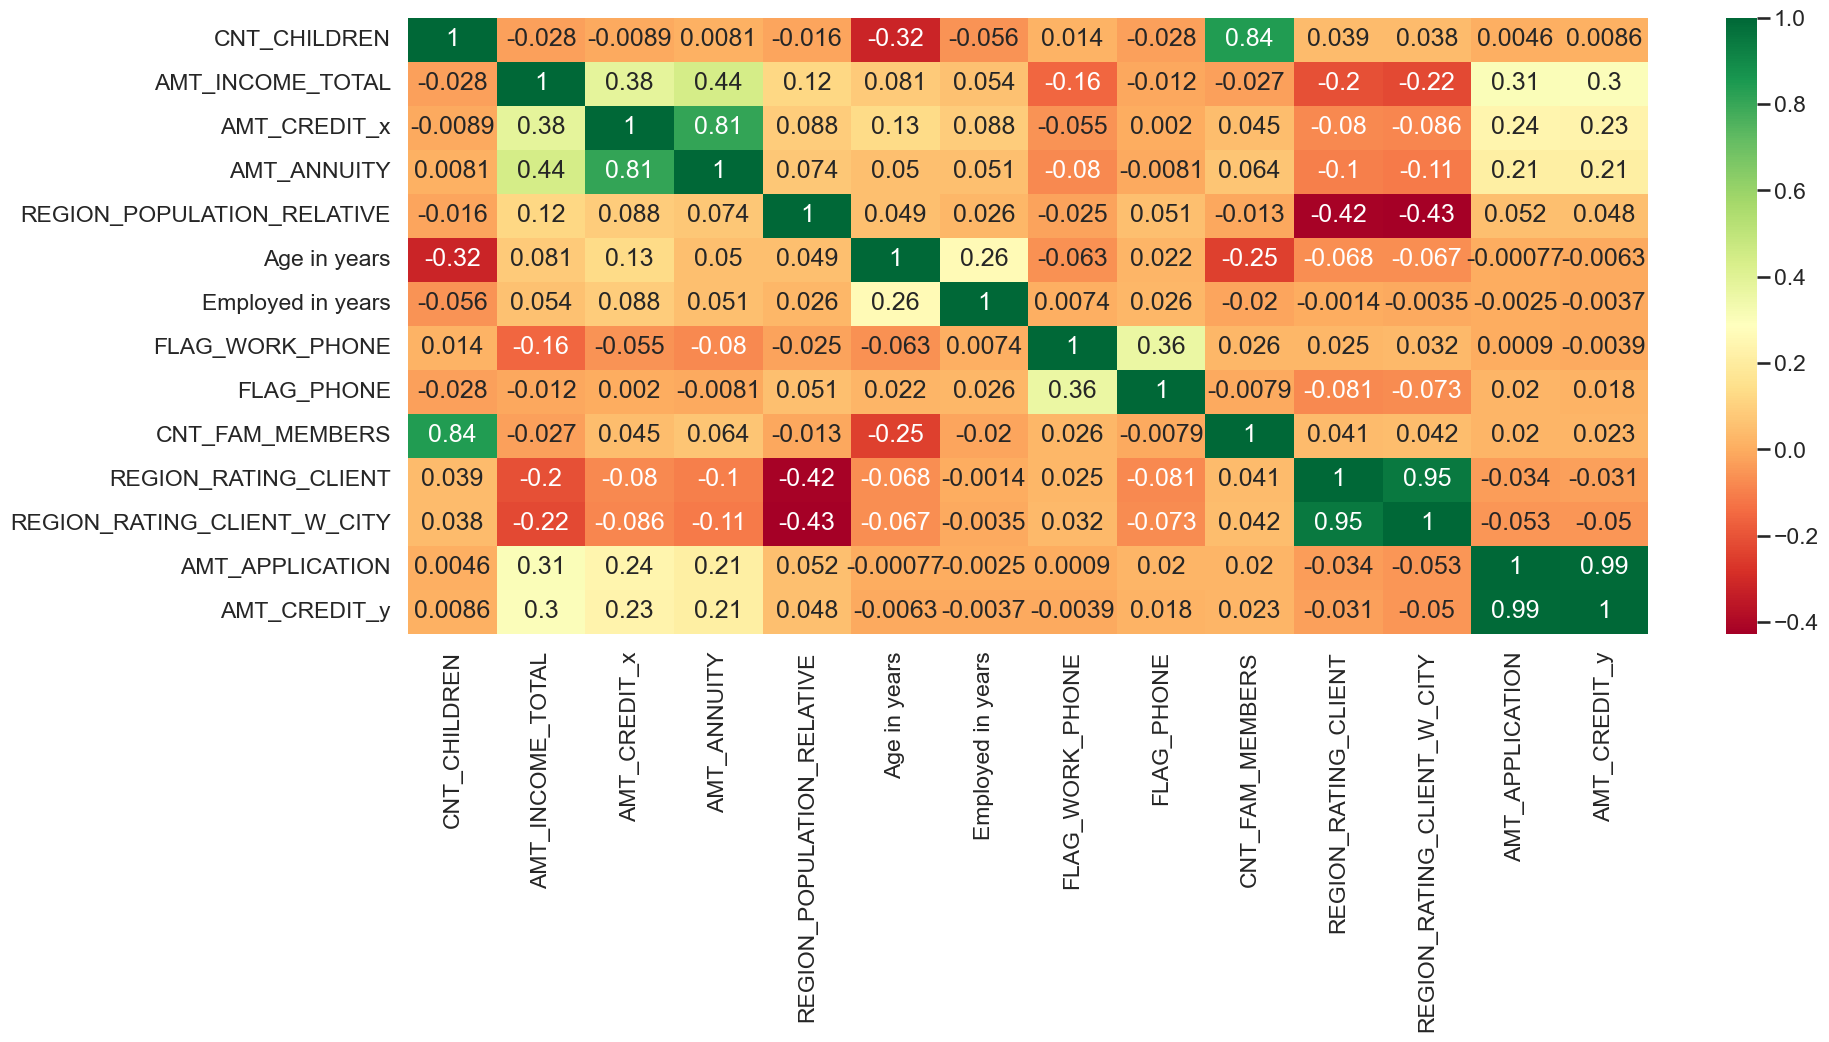

In [628]:
plt.figure(figsize=(20,8))
sns.heatmap(data=final_correlation_matrix,cmap="RdYlGn",annot=True)
plt.savefig('plot image 17.png')
plt.show()

### Observation 23
a) Those who don't provide mobile no. has negative corelation with amount credit applied and previous amount credit applied, which shows they are  
   likely to get defaulters.
b) Also client from poor region and city rating have negative corelation with amount credit, amount icome total.

## FINAL CONCLUSION
a) Bank shall focus on people with income type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing type other than municipal apartment for successful payments.
b) People with housing type office appartment and rented appartment can be targeted as they are having least number of unsuccessful payments.
c) Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

In [ ]:
# Downloading the graph plot file

In [632]:
from IPython.display import FileLink
FileLink("plot image 1.png")


C:\Users\user\plot image 1.png

In [634]:
from IPython.display import FileLink
FileLink("plot image 2.png")

C:\Users\user\plot image 2.png

In [636]:
from IPython.display import FileLink
FileLink("plot image 3.png")

C:\Users\user\plot image 3.png

In [638]:
from IPython.display import FileLink
FileLink("plot image 4.png")

C:\Users\user\plot image 4.png

In [640]:
from IPython.display import FileLink
FileLink("plot image 5.png")

C:\Users\user\plot image 5.png

In [642]:
from IPython.display import FileLink
FileLink("plot image 6.png")

C:\Users\user\plot image 6.png

In [644]:
from IPython.display import FileLink
FileLink("plot image 7.png")

C:\Users\user\plot image 7.png

In [646]:
from IPython.display import FileLink
FileLink("plot image 8.png")

C:\Users\user\plot image 8.png

In [650]:
from IPython.display import FileLink
FileLink("plot image 10.png")

C:\Users\user\plot image 10.png

In [652]:
from IPython.display import FileLink
FileLink("plot image 11.png")

C:\Users\user\plot image 11.png

In [654]:
from IPython.display import FileLink
FileLink("plot image 12.png")

C:\Users\user\plot image 12.png

In [656]:
from IPython.display import FileLink
FileLink("plot image 13.png")

C:\Users\user\plot image 13.png

In [658]:
from IPython.display import FileLink
FileLink("plot image 14.png")

C:\Users\user\plot image 14.png

In [660]:
from IPython.display import FileLink
FileLink("plot image 15.png")

C:\Users\user\plot image 15.png

In [662]:
from IPython.display import FileLink
FileLink("plot image 16.png")

C:\Users\user\plot image 16.png

In [664]:
from IPython.display import FileLink
FileLink("plot image 17.png")

C:\Users\user\plot image 17.png

In [670]:
from IPython.display import FileLink
FileLink("plot image 18.png")

C:\Users\user\plot image 18.png